##Import data & libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
#import missingno as msno
#from google.colab import data_table
#from tabulate import tabulate
import scipy.stats as st
import matplotlib.patches as mpl_patches
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from scipy.stats import pearsonr
# !pip install powerbiclient

In [2]:
final_df = pd.read_csv('data/final_df.csv')
final_df

#final_df.to_csv('data/final_df.csv')


Date  opening_price  highest_price  lowest_price  closing_price  \
0     2013-07-17           97.1          100.0          96.2           98.5   
1     2013-07-18           98.5           98.8          86.2           90.1   
2     2013-07-19           90.1           95.2          87.6           92.0   
3     2013-07-20           92.0           93.1          89.3           89.8   
4     2013-07-21           89.8           92.0          88.0           92.0   
...          ...            ...            ...           ...            ...   
3169  2022-03-21        41282.0        41532.0       40530.0        41022.0   
3170  2022-03-22        41022.0        43327.9       40893.0        42373.0   
3171  2022-03-23        42373.0        43027.0       41795.0        42912.0   
3172  2022-03-24        42911.0        44251.0       42658.0        44013.0   
3173  2022-03-25        44013.0        45112.0       43622.0        44331.0   

      transactions_in_blockchain  avg_block_size  sent_by_adress  \
0                        40459.0        100827.0         45703.0   
1                        41009.0        117039.0         45106.0   
2                        36588.0         96865.0         43518.0   
3                        33516.0         82983.0         32982.0   
4                        35257.0         82978.0         35799.0   
...                          ...             ...             ...   
3169                    259759.0        612943.0        477545.0   
3170                    264420.0        639844.0        499333.0   
3171                    264037.0        702531.0        492109.0   
3172                    262844.0        661257.0        498050.0   
3173                    290563.0        679955.0        548095.0   

      avg_mining_difficulty  avg_hashrate  ...  Bull_Bear_Diff  \
0              2.616288e+07  2.162608e+14  ...         -210.30   
1              2.616288e+07  2.276863e+14  ...        19643.49   
2              2.616288e+07  2.192230e+14  ...       -20914.38   
3              2.616288e+07  2.383648e+14  ...         4303.56   
4              2.616288e+07  2.422884e+14  ...         -360.23   
...                     ...           ...  ...             ...   
3169           2.745271e+13  2.089963e+20  ...        -1982.48   
3170           2.745271e+13  2.152284e+20  ...        -1604.72   
3171           2.745271e+13  1.902171e+20  ...          298.95   
3172           2.745271e+13  2.069049e+20  ...           16.84   
3173           2.745271e+13  1.963037e+20  ...        49799.65   

      next_day_closing_price      ISA_9    ISB_26     ITS_9    IKS_26  \
0                       90.1    108.900    109.55     88.35     87.70   
1                       92.0    108.200    107.50     89.85     87.70   
2                       89.8    108.300    107.50     94.60     87.70   
3                       92.0    108.575    112.00     95.20     87.70   
4                       91.6    108.000    112.00     94.05     85.45   
...                      ...        ...       ...       ...       ...   
3169                 42373.0  40793.675  40270.80  39994.70  39825.80   
3170                 42912.0  39755.725  40245.50  40470.75  41178.25   
3171                 44013.0  39659.275  40002.50  40774.40  41178.25   
3172                 44331.0  38851.375  39370.40  41602.10  41178.25   
3173                 44548.0  38726.075  39370.40  42673.40  41238.15   

       ICS_26  Social_Volume  Social_Volume_AI  Weighted sentiment  
0       106.8            869              1503           -1.919762  
1       109.6            939              1748           -1.236765  
2       112.6            828              1501           -1.240729  
3       110.0            717              1311           -1.738634  
4       109.0            738              1361           -1.169890  
...       ...            ...               ...                 ...  
3169  40382.0          12950             17680           -0.487291  
3170  39703.0          1

### Creamos 2 datasets adicionales, uno con rentabilidades y otro binaro de incremento de precio

In [4]:
prof_df = final_df.copy()
for col in prof_df.columns:
    if col!='Date':
        prof_df[col] = (prof_df[col] - prof_df[col].shift(+1))/prof_df[col].shift(+1)

prof_df.head()

Date  opening_price  highest_price  lowest_price  closing_price  \
0  2019-07-21            NaN            NaN           NaN            NaN   
1  2019-07-22      -0.010335      -0.007121     -0.023558      -0.028177   
2  2019-07-23      -0.028213      -0.036238     -0.032472      -0.050305   
3  2019-07-24      -0.050476      -0.045071     -0.028524      -0.008535   
4  2019-07-25      -0.008344       0.025962      0.020096       0.014381   

   transactions_in_blockchain  avg_block_size  sent_by_adress  \
0                         NaN             NaN             NaN   
1                    0.124940        0.091967        0.327351   
2                    0.003032        0.095619       -0.001963   
3                   -0.077321       -0.050601       -0.054302   
4                    0.138555        0.062487        0.156359   

   avg_mining_difficulty  avg_hashrate  ...  Number of Transactions  \
0                    NaN           NaN  ...                     NaN   
1               0.000000     -0.034659  ...                0.124906   
2              -0.003420     -0.174140  ...                0.002984   
3              -0.002145      0.145325  ...               -0.077299   
4               0.000000     -0.057266  ...                0.138527   

   large_tx_volume_USD_adj  large_holders_netflow  in_out_ratio_adj  \
0                      NaN                    NaN               NaN   
1                 0.262149               0.975117         -0.033468   
2                 0.063114              -1.514052         -0.048950   
3                 0.077039              -5.767827         -0.045171   
4                -0.086968              -1.444454          0.029761   

   profit_losses_ratio_adj  New Addresses  Active Addresses  Bull_Bear_Diff  \
0                      NaN            NaN               NaN             NaN   
1                -0.031218       0.266628          0.285307       -1.990430   
2                -0.045727       0.048427          0.007753        2.702346   
3                -0.042414      -0.090261          0.006586        1.836160   
4                 0.028032       0.189229          0.081682       -1.596533   

   next_day_closing_price  FUTMSCIACWI  
0                     NaN          NaN  
1               -0.050305     0.000000  
2               -0.008535     0.005052  
3                0.014381     0.003414  
4               -0.011493    -0.005104  

[5 rows x 56 columns]

In [5]:
prof_df.drop(prof_df.head(1).index,inplace=True)


In [6]:
up_df = prof_df.copy()
for col in up_df.columns:
    if col!='Date':
        up_df.loc[up_df[col] > 0, col] = int(1)
        up_df.loc[up_df[col] <= 0, col] = int(0)
up_df

Date  opening_price  highest_price  lowest_price  closing_price  \
1    2019-07-22            0.0            0.0           0.0            0.0   
2    2019-07-23            0.0            0.0           0.0            0.0   
3    2019-07-24            0.0            0.0           0.0            0.0   
4    2019-07-25            0.0            1.0           1.0            1.0   
5    2019-07-26            1.0            1.0           0.0            0.0   
..          ...            ...            ...           ...            ...   
988  2022-04-04            1.0            0.0           0.0            1.0   
989  2022-04-05            1.0            1.0           1.0            0.0   
990  2022-04-06            0.0            0.0           0.0            0.0   
991  2022-04-07            0.0            0.0           0.0            1.0   
992  2022-04-08            1.0            1.0           0.0            0.0   

     transactions_in_blockchain  avg_block_size  sent_by_adress  \
1                           1.0             1.0             1.0   
2                           1.0             1.0             0.0   
3                           0.0             0.0             0.0   
4                           1.0             1.0             1.0   
5                           0.0             0.0             0.0   
..                          ...             ...             ...   
988                         1.0             1.0             1.0   
989                         0.0             1.0             0.0   
990                         1.0             0.0             0.0   
991                         0.0             1.0             1.0   
992                         0.0             0.0             1.0   

     avg_mining_difficulty  avg_hashrate  ...  Number of Transactions  \
1                      0.0           0.0  ...                     1.0   
2                      0.0           0.0  ...                     1.0   
3                      0.0           1.0  ...                     0.0   
4                      0.0           0.0  ...                     1.0   
5                      0.0           1.0  ...                     0.0   
..                     ...           ...  ...                     ...   
988                    0.0           1.0  ...                     1.0   
989                    0.0           1.0  ...                     0.0   
990                    0.0           0.0  ...                     1.0   
991                    0.0           1.0  ...                     0.0   
992                    0.0           0.0  ...                     0.0   

     large_tx_volume_USD_adj  large_holders_netflow  in_out_ratio_adj  \
1                        1.0                    1.0               0.0   
2                        1.0                    0.0               0.0   
3                        1.0                    0.0               0.0   
4                        0.0                    0.0               1.0   
5                        0.0                    1.0               0.0   
..                       ...                    ...               ...   
988                      1.0                    0.0               0.0   
989                      1.0                    1.0               1.0   
990                      1.0                    0.0               0.0   
991                      1.0                    0.0               0.0   
992                      1.0                    0.0               0.0   

     profit_losses_ratio_adj  New Addresses  Active Addresses  Bull_Bear_Diff  \
1                        0.0            1.0               1.0             0.0   
2                        0.0            1.0               1.0             1.0   
3                        0.0            0.0               1.0             1.0   
4                        1.0            1.0               1.0             0.0   
5                        0.0            0.0               0.0             0.0   
..                       ... 

### Funciones para explorar correlaciones

In [3]:
def heatmap(df):
    plt.figure(figsize=(70,70))
    plt.rc('xtick', labelsize=40) 
    plt.rc('ytick', labelsize=40) 
    return sns.heatmap(df.corr(method='spearman'), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

def correlation_1_vs_all(df, feature, threshold):
    pd.set_option('display.max_rows', None)
    df = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    df.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    df = df.drop(df[df['Correlation Coefficient'] == 1.0].index)
    return df[(df['Feature 1'] == feature) & (df['Correlation Coefficient'] > threshold)]

def correlation_all_vs_all(df, threshold, target_feature):
    pd.set_option('display.max_rows', None)
    df_temp = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    df_temp.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
    df_temp.drop(df.iloc[1::2].index, inplace=True)
    df_temp = df_temp.drop(df_temp[df_temp['Correlation Coefficient'] == 1.0].index)
    lista_feature1= df_temp['Feature 1']
    lista_feature2= df_temp['Feature 2']
    lista_corr1=[]
    lista_corr2=[]
    for x in lista_feature1:
        lista_corr1.append(np.corrcoef(df[x],df[target_feature])[0][1])
    
    for x in lista_feature2:
        lista_corr2.append(np.corrcoef(df[x],df[target_feature])[0][1])
        
    df_temp['corr1_target']= lista_corr1
    df_temp['corr2_target']= lista_corr2

    return df_temp[df_temp['Correlation Coefficient'] > threshold]

### DATOS EN BRUTO

<AxesSubplot:>

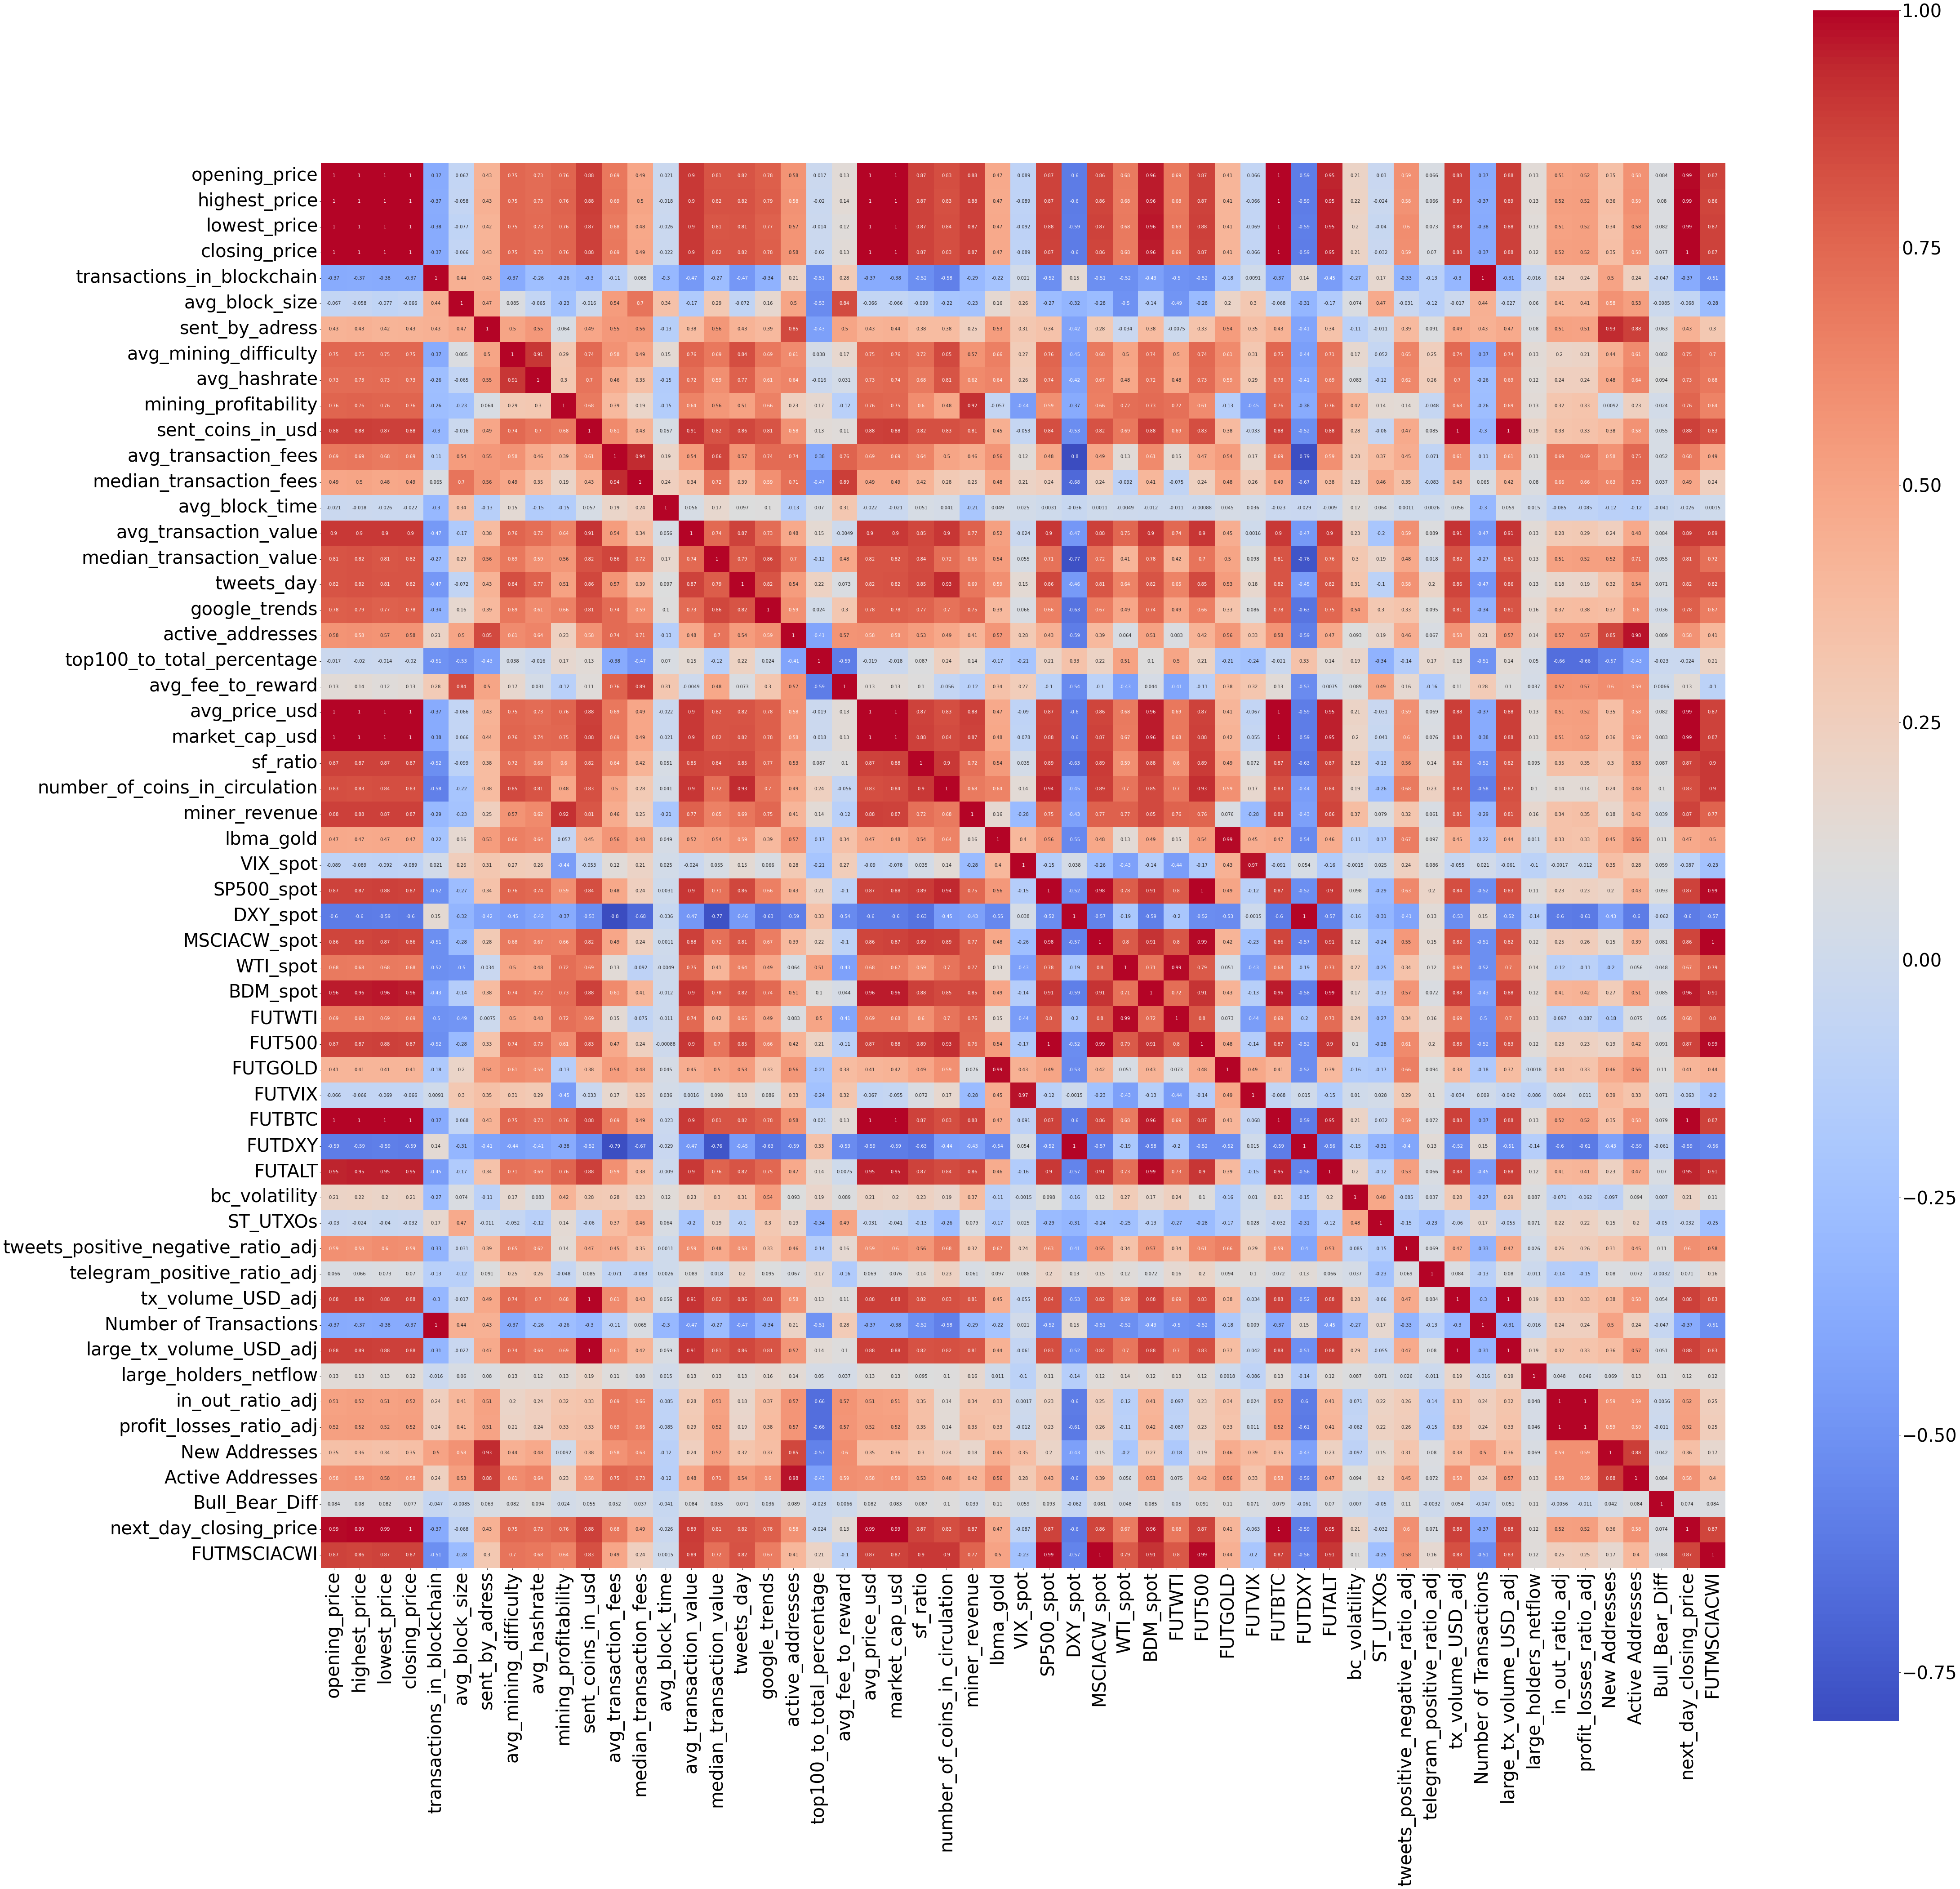

In [13]:
heatmap(final_df)

In [4]:
correlation_1_vs_all(final_df, 'next_day_closing_price', 0.9)

Feature 1       Feature 2  Correlation Coefficient
102  next_day_closing_price   closing_price                 0.998890
106  next_day_closing_price   avg_price_usd                 0.998472
108  next_day_closing_price   highest_price                 0.998443
110  next_day_closing_price  market_cap_usd                 0.998294
113  next_day_closing_price    lowest_price                 0.998265
127  next_day_closing_price   opening_price                 0.997852
140  next_day_closing_price          FUTBTC                 0.996880
144  next_day_closing_price           ITS_9                 0.996423
164  next_day_closing_price          IKS_26                 0.991578
188  next_day_closing_price          ICS_26                 0.972246
232  next_day_closing_price           ISA_9                 0.962654
256  next_day_closing_price   miner_revenue                 0.950985
281  next_day_closing_price          ISB_26                 0.945820
304  next_day_closing_price        ETH_spot                 0.937819
358  next_day_closing_price    MSCIACW_spot                 0.918209
374  next_day_closing_price          FUTALT                 0.915352
411  next_day_closing_price          FUT500                 0.902745

In [5]:
correlation_all_vs_all(final_df, 0.9, 'next_day_closing_price')

Feature 1                       Feature 2  \
60           Number of Transactions      transactions_in_blockchain   
62                tx_volume_USD_adj               sent_coins_in_usd   
64                   market_cap_usd                   avg_price_usd   
66                    avg_price_usd                   highest_price   
68                    avg_price_usd                   opening_price   
70                     lowest_price                   avg_price_usd   
72                    avg_price_usd                   closing_price   
74          large_tx_volume_USD_adj               tx_volume_USD_adj   
76                    highest_price                  market_cap_usd   
78                     lowest_price                  market_cap_usd   
80                    opening_price                   highest_price   
82                         DXY_spot                          FUTDXY   
84                       SP500_spot                          FUT500   
86                    highest_price                   closing_price   
88                   market_cap_usd                   opening_price   
90                   market_cap_usd                   closing_price   
92                    closing_price                    lowest_price   
94          large_tx_volume_USD_adj               sent_coins_in_usd   
96                     lowest_price                   opening_price   
98                     lowest_price                   highest_price   
100                   closing_price                   opening_price   
102          next_day_closing_price                   closing_price   
104                in_out_ratio_adj         profit_losses_ratio_adj   
106          next_day_closing_price                   avg_price_usd   
108          next_day_closing_price                   highest_price   
110          next_day_closing_price                  market_cap_usd   
112                    lowest_price          next_day_closing_price   
114                  market_cap_usd                          FUTBTC   
116                           ITS_9                   opening_price   
118                           ITS_9                   avg_price_usd   
120                           ITS_9                   highest_price   
122                           ITS_9                  market_cap_usd   
124                   closing_price                          FUTBTC   
126                   opening_price          next_day_closing_price   
128                   avg_price_usd                          FUTBTC   
130                    lowest_price                          FUTBTC   
132                          FUTBTC                   highest_price   
134                           ITS_9                   closing_price   
136                    lowest_price                           ITS_9   
138                   opening_price                          FUTBTC   
140          next_day_closing_price                          FUTBTC   
142                           ITS_9                          IKS_26   
144          next_day_closing_price                           ITS_9   
146                          FUTBTC                           ITS_9   
148                          IKS_26                   opening_price   
150                  market_cap_usd                          IKS_26   
152                   highest_price                          IKS_26   
154                   avg_price_usd                          IKS_26   
156                active_addresses                Active Addresses   
158                          IKS_26                    lowest_price   
160                   closing_price                          IKS_26   
162                          ISB_26                           ISA_9   
164          next_day_closing_price                          IKS_26   
166                          FUTBTC                          IKS_26   
168                    avg_hashrate           avg_mining_difficulty   
170                          FUT500               

In [6]:
# Remove very similar variables
final_df.drop(['Number of Transactions'],axis=1,inplace=True)

# Make a ratio with Large tx volume as it highly correlates with TX volume
final_df["large_trasactions_over_total"] = final_df["large_tx_volume_USD_adj"] / final_df["tx_volume_USD_adj"] 
final_df.drop(["large_tx_volume_USD_adj"],axis=1,inplace=True)

final_df.drop(['tx_volume_USD_adj'],axis=1,inplace=True)




In [64]:
# remove avg. price
#final_df.drop(['avg_price_usd'],axis=1,inplace=True)


#final_df.drop(['FUT500'],axis=1,inplace=True)

# EXPLORATION...YA LO HARÉ

In [18]:
def plot_data(df,feature_name,exclude_feature='next_day_closing_price'):
    random_color = (random.random(), random.random(), random.random())
    df.plot(x='Date',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'Date VS {feature_name.replace("_"," ")}')
    plt.ylabel(feature_name)
    plt.show()

    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

    corr = df.corr().loc[[feature_name],:].sort_values(by=feature_name,axis=1).drop(columns=[feature_name,exclude_feature])
    plt.figure(figsize = (25,5))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":12},linewidths=1, linecolor='black',)
    plt.title(f'Correlation with other features')
    plt.show()
    
def plot_scatter(df,scatter_list,scatter_with):
    fig,axs = plt.subplots(1,len(scatter_list),sharey=False,figsize=(7*len(scatter_list),7))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i,feat in enumerate(scatter_list):
        x = sorted(list(df[scatter_with]))
        y = sorted(list(df[feat]))

        axs[i].scatter(x,y,marker=".",color=next(colors)["color"],label=feat)

        line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_ylabel(feat)
        axs[i].grid()
        axs[i].set_xlabel(scatter_with)
        axs[i].legend()
    plt.show()

###01.Price
* Supply and demand determine the price of a bitcoin. When demand for bitcoins increases, the price increases, and when demand falls, the price falls.

* Currently, the Demand is outstripping the supply of Big players like the company Square, Paypal and others buying BTC massively.

#### Next Day Closing Price

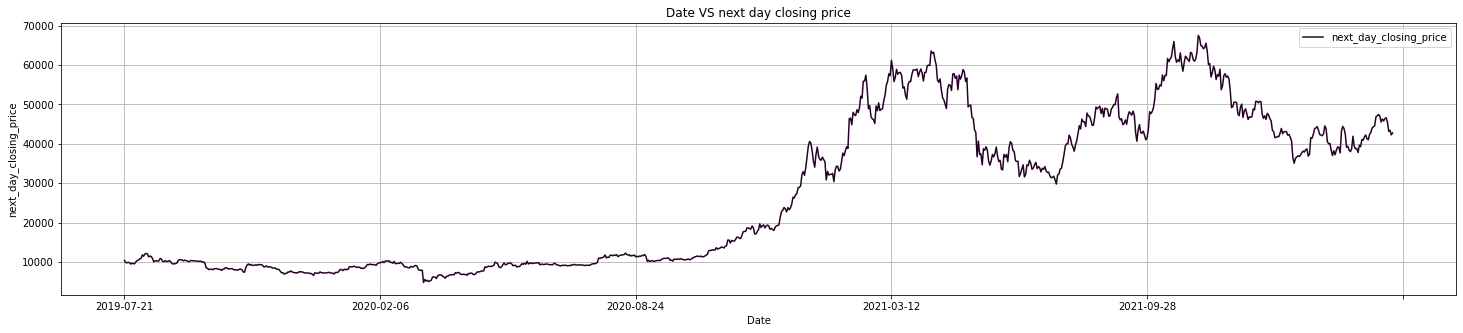

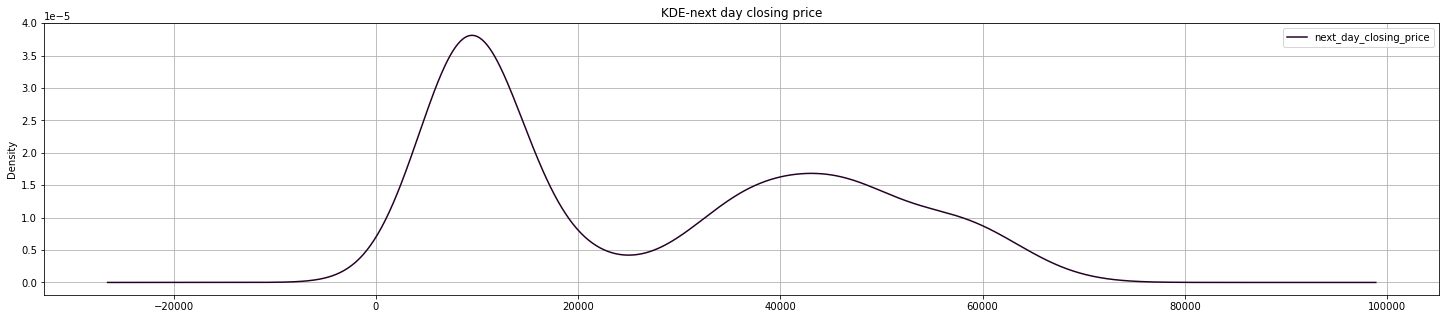

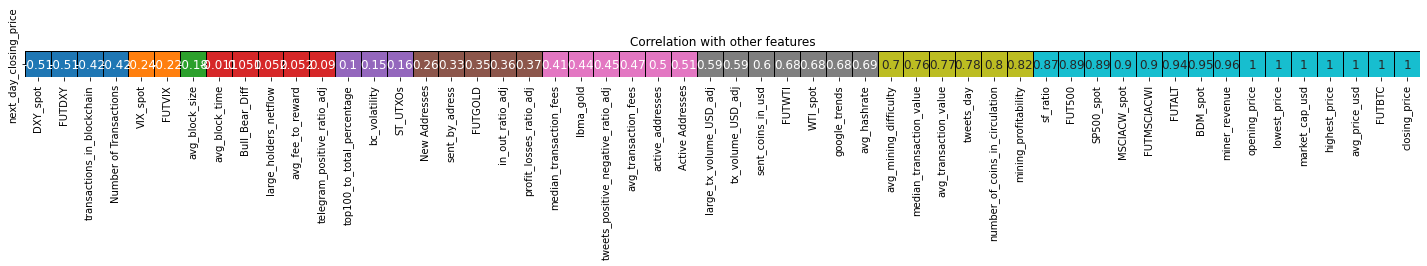

In [9]:
plot_data(final_df,feature_name='next_day_closing_price')

**Observations**

1.   the distribution is right skewed, which can also be observed in bar plot such that a huge chunk of prices belongs to 0 to 2500 USD between 2013 to 2017

2.  The prices are volatile. They were stable from 2013 to 2017. Then there is a vast increase. The prices were stable for some time.After 2020 the prices have increased heavily but yet again they saw some decrease.

3. Miner revenue, which includes both transaction fees and rewards, is well correlated with price.

4. Other features with which prices show good correlation are miner revenue, avg_transaction_value,sent_coins_in_usd, avg_mining_difficulty, avg_hashrate. 

5.  Twitter and google trends show the effect of social media. We can interpret it as more people searched or discussed about it, more people invested, which made a positive correlation.




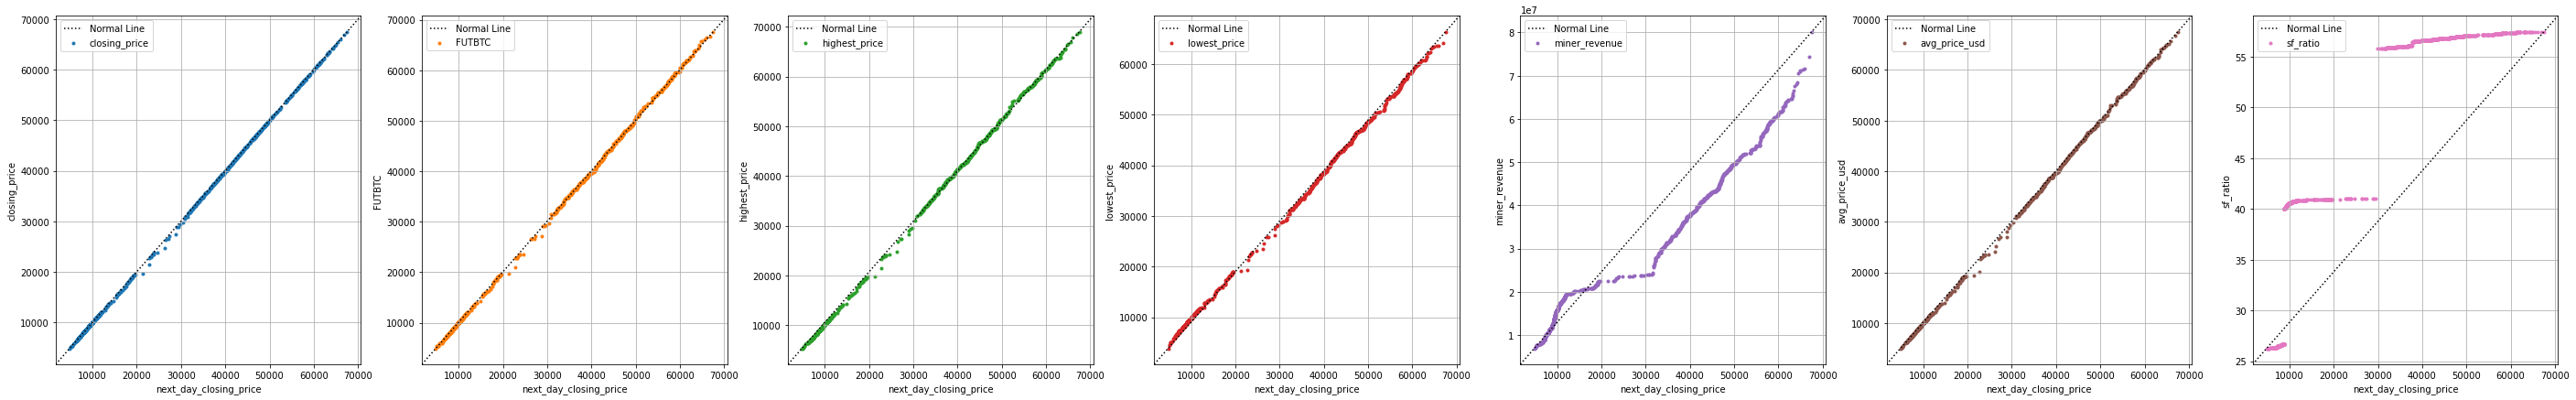

In [13]:
scatter_list = ['closing_price','FUTBTC','highest_price','lowest_price','miner_revenue','avg_price_usd','sf_ratio']
plot_scatter(final_df,scatter_list,'next_day_closing_price')

###02.Number of transactions in blockchain per day
* Bitcoin transactions are messages which are digitally signed using cryptography and sent to the entire Bitcoin Network for verification. 
* New Blocks are added to the blockchain every 10 minutes. 
* Transactions are public and can be found on the digital ledger known as the blockchain.
* The number of daily confirmed transactions highlights the value of the Bitcoin network to securely transfer funds without a third party. i.e. more the transactions, more valuable is the bitcoin network

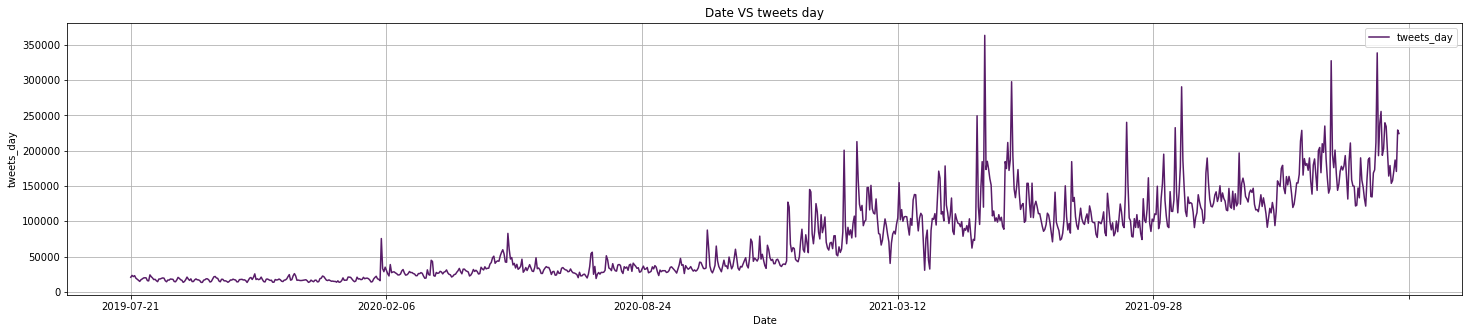

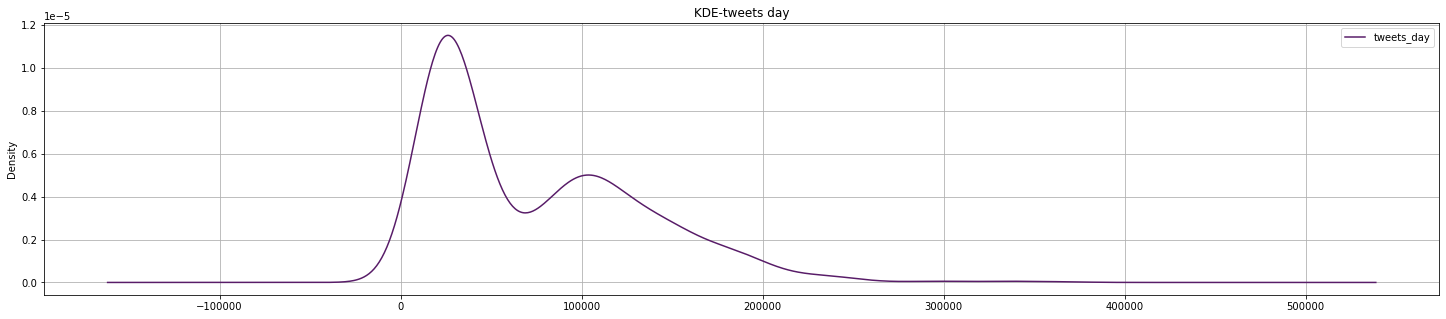

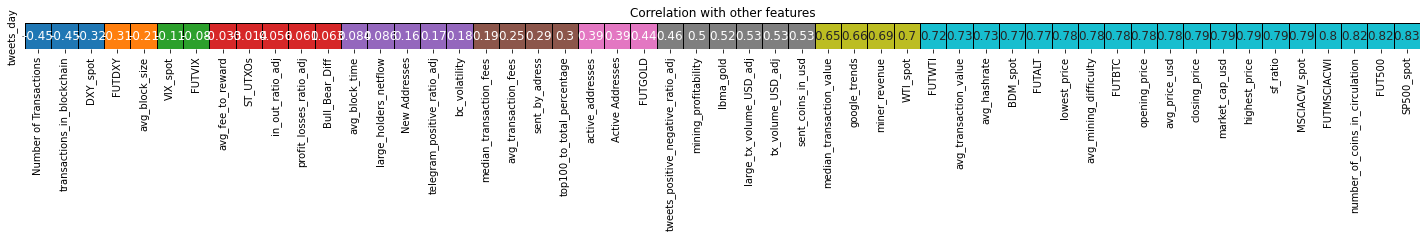

In [15]:
plot_data(final_df,feature_name='tweets_day')

**Observations**


1.   As bitcoins started gaining popularity, there has been a vast increase in the number of payment transactions. ,
2.  As the transactions increases more blocks will be added to the network, thus increasing its size, which is visible from correlation with block size. Number of sent by address is highly correlated as the transactions are calculated by sent and received payments.
3. It has a less correlation with price of same day which implies higher number of transactions does not increase the price.


###03.Average block size(Kb)
* Blocks are files where transactional information related to the Bitcoin network is permanently recorded, i.e. once written, it cannot be altered or removed.

* It records the most recent Bitcoin transactions that have not yet entered in any prior blocks. Thus, a block is like a page of a ledger. Each time a block is ‘completed’, it gives way to the next block in the blockchain. 

* The maximum block size is currently set at 1 megabyte

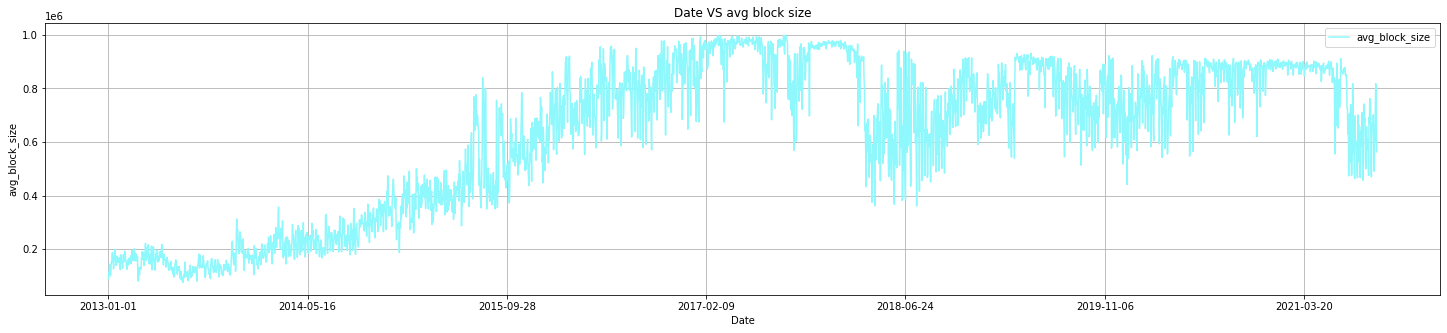

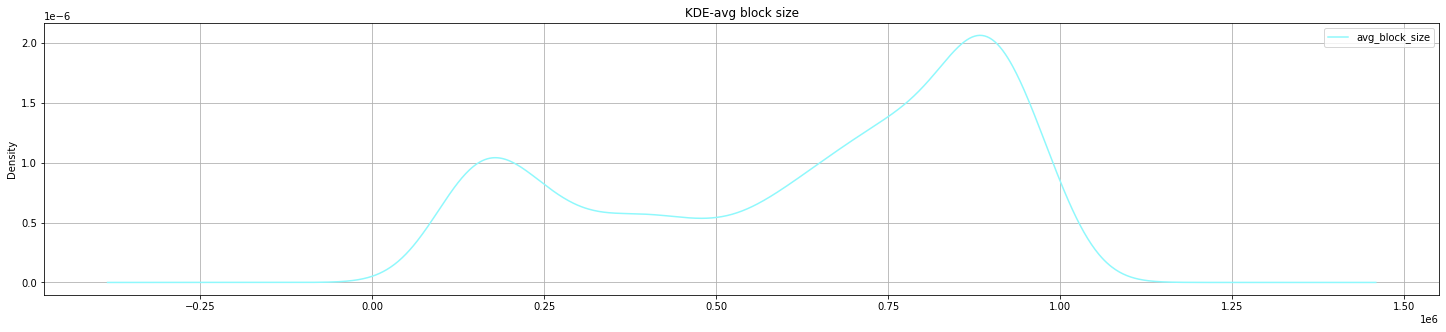

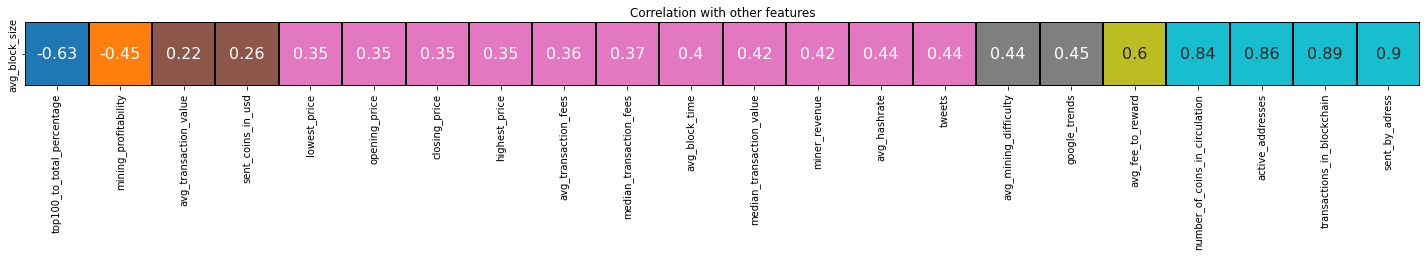

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_block_size')

**Observations**

1.   Block size follows similar trends to the number of transactions. Which is also visible from its correlation with the number of transactions.

2. The increase over time can be linked with gain in popularity of bitcoin

###04 & 05.Number of sent by adresses(From) and number of active adress(From and To)
* Sent from addresses are distinct Bitcoin addresses from which payments are made everyday

* active address is the number of unique addresses taking part in a transaction by either sending or receiving Bitcoins

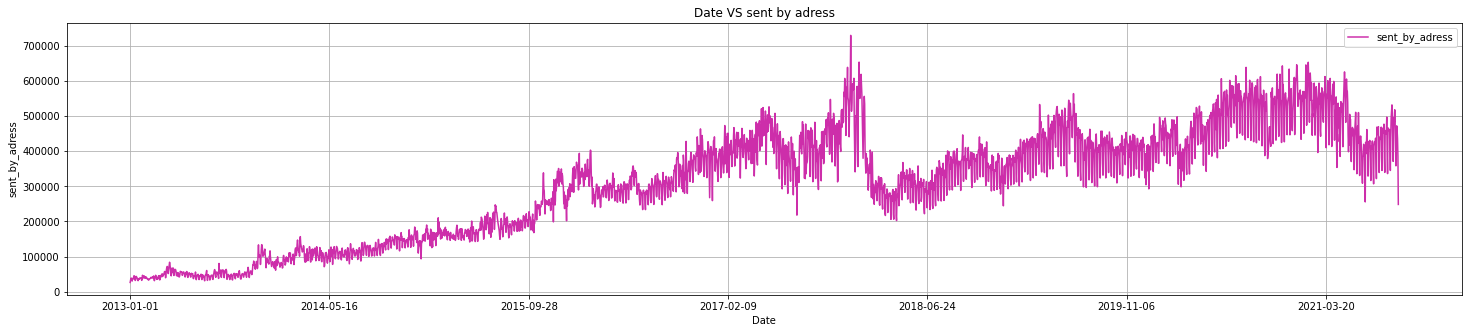

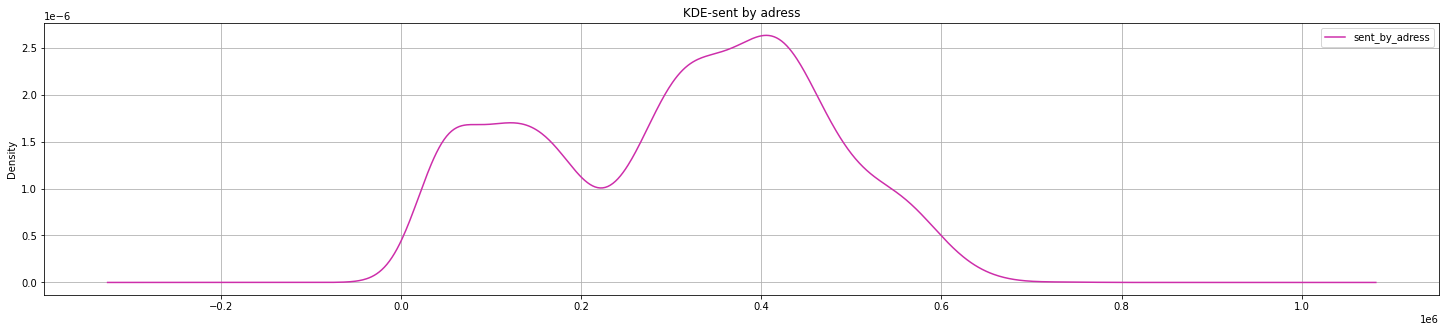

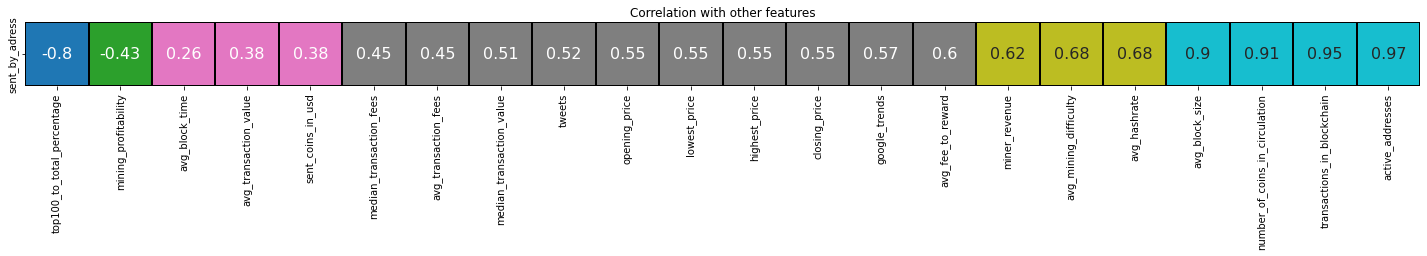

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='sent_by_adress')

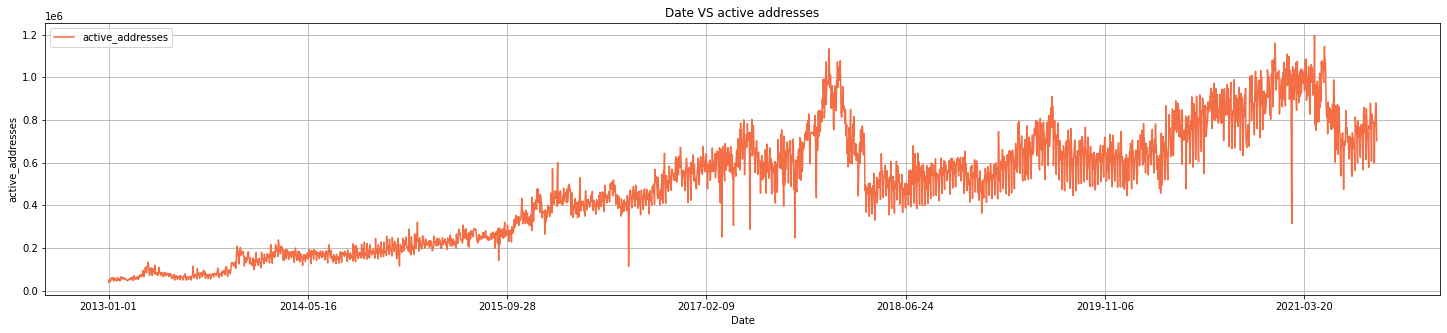

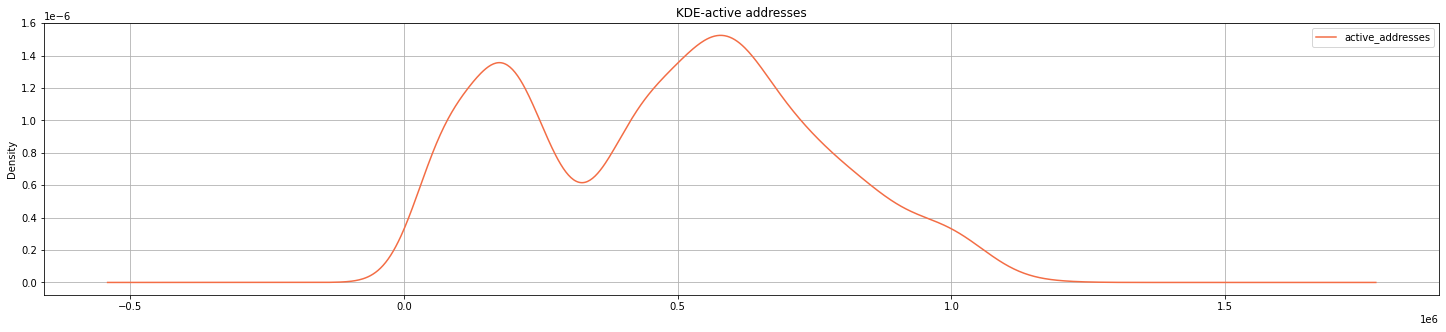

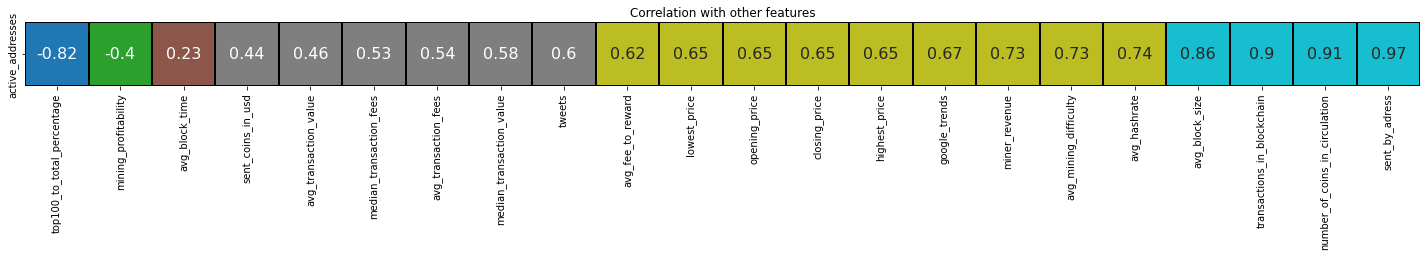

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='active_addresses')

**Observations**

1. Similar to block size and transactions, the number of sent addresses increased over time and it follows an unskewed distribution

2. As sent address is a subset of active addresses, it justifies positive correlation
3. Block size will increase as more number of people make a transaction

###06.Average mining difficulty per day(Hash Per day)
* The difficulty level reflects how difficult the proof of work calculation with respect to the difficulty value set at the beginning, i.e., 1. 

* A high difficulty means that it will take more computing power to mine the same number of blocks, making the network more secure against attacks.

* The difficulty is adjusted every 2016 blocks (every 2 weeks approximately) so that the average time between each block remains 10 minutes. 

* It will be increased if more number of blocks are being created within a 2-week period and will be reduced if less  blocks are created.

new_difficulty = (old_difficulty X (2016 blocks X 10 minutes)) / (the time took in minutes to mine the last 2016 blocks)

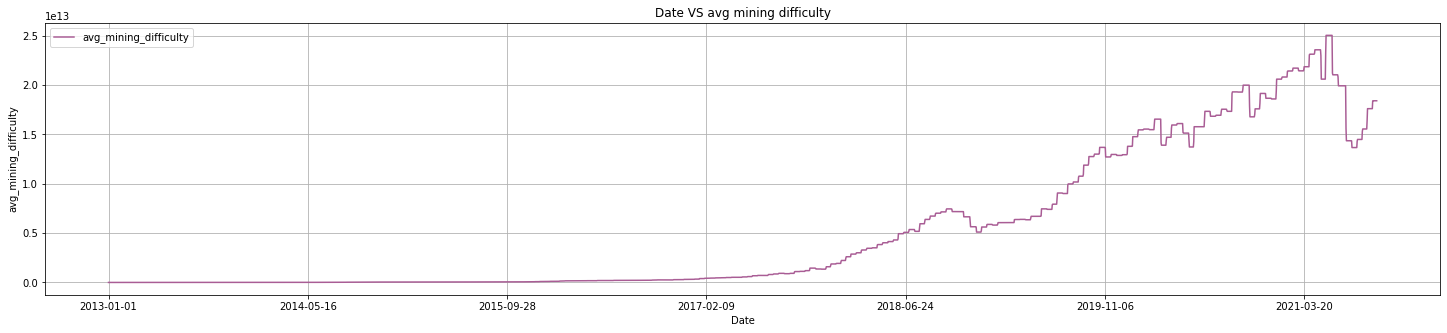

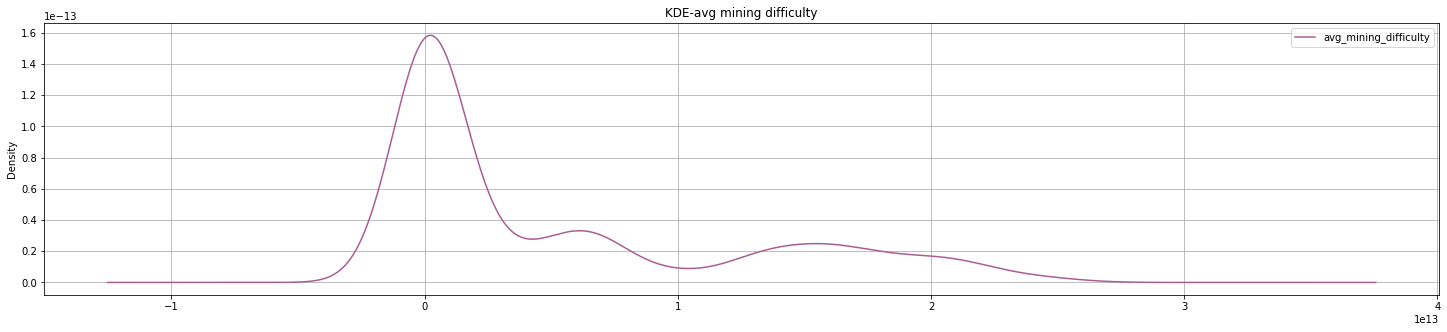

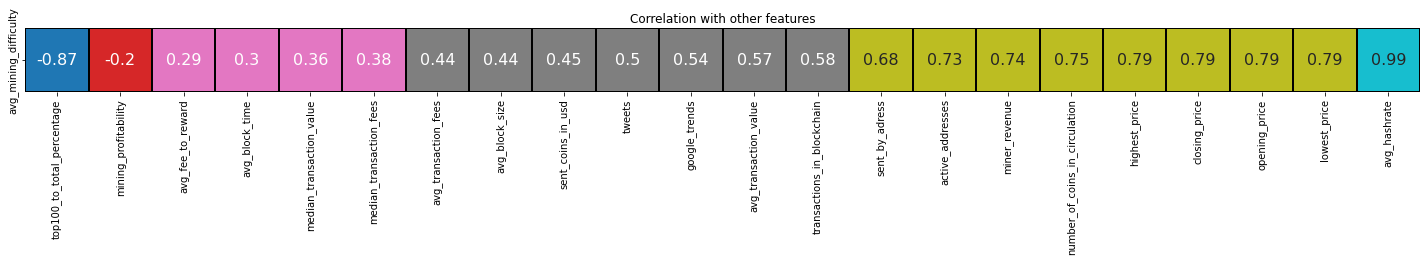

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_mining_difficulty')

**Observations**

1. From bar chart we can observe that as bitcoin gained popularity, the number of users increased, making it harder harder to mine the coins.

2. As the difficulty increase more processing power, i.e. hash rate is required thus it shows a high correlation with hash rate



###07.Average hashrate (hash/s) per day

* Hashrate is a measure of the computational power per second used when mining. It is measured in of hash/second, meaning how many calculations per second can be performed. 

* Machines with a high hash power are highly efficient and can process a lot of data in a single second.

* Mining difficulty directly depends on hash rate

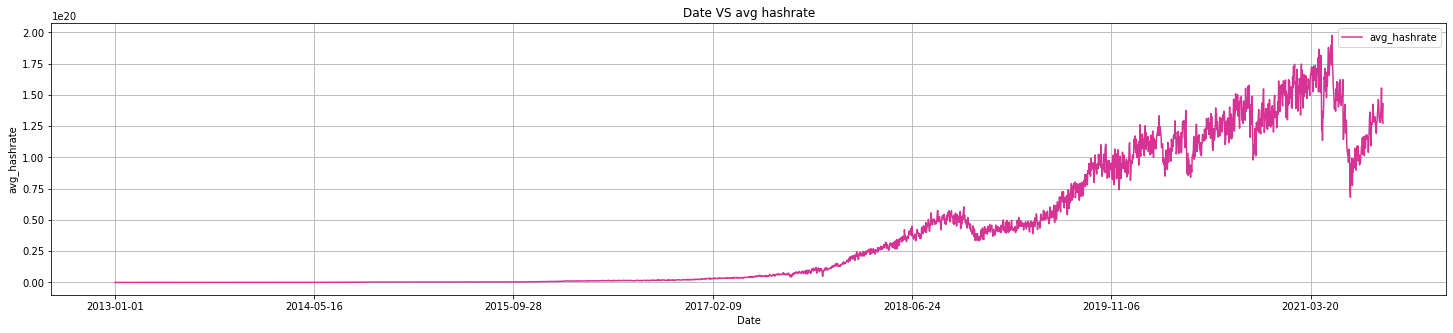

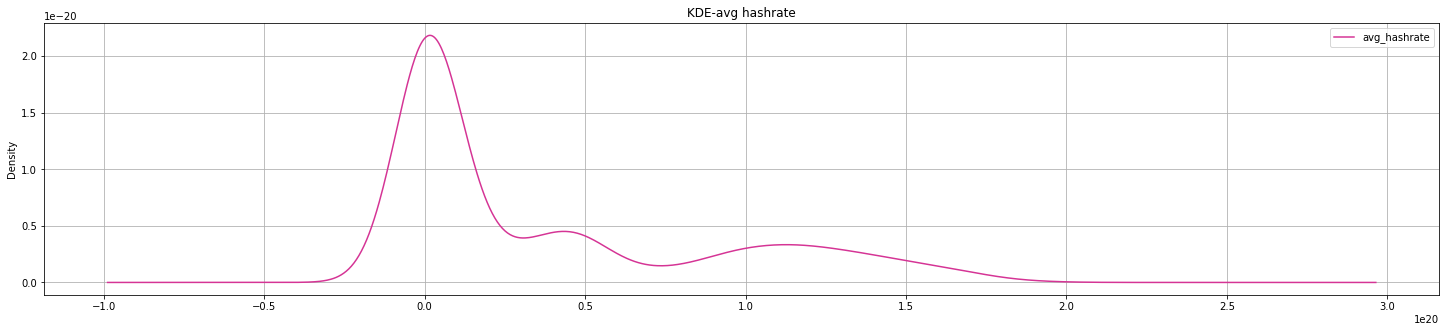

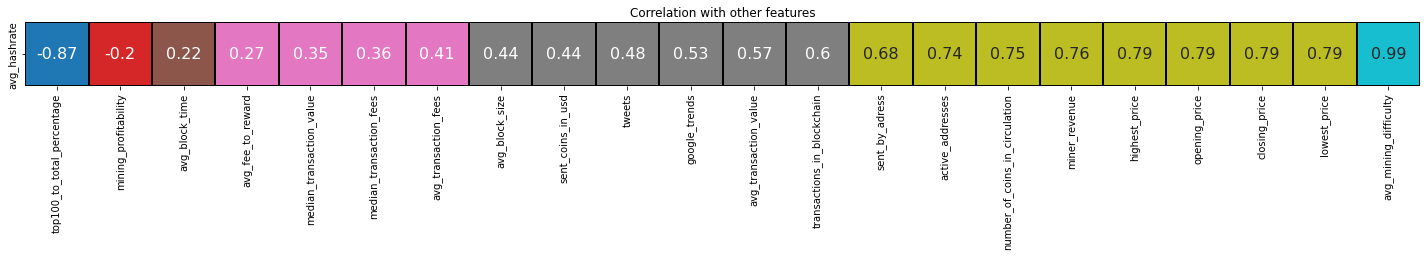

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_hashrate')

**Observations**

1. This follows a very similar trend to mining difficulty as mining difficulty and hashrate are correlated.
2. As more people started mining the blocks, it required more hashing power per day, ultimately increasing the difficulty.
3. Hashrate increased from 2016 and fall in 2018, when the prices declined.

###08.Mining Profitability USD/Day for 1 Hash/s

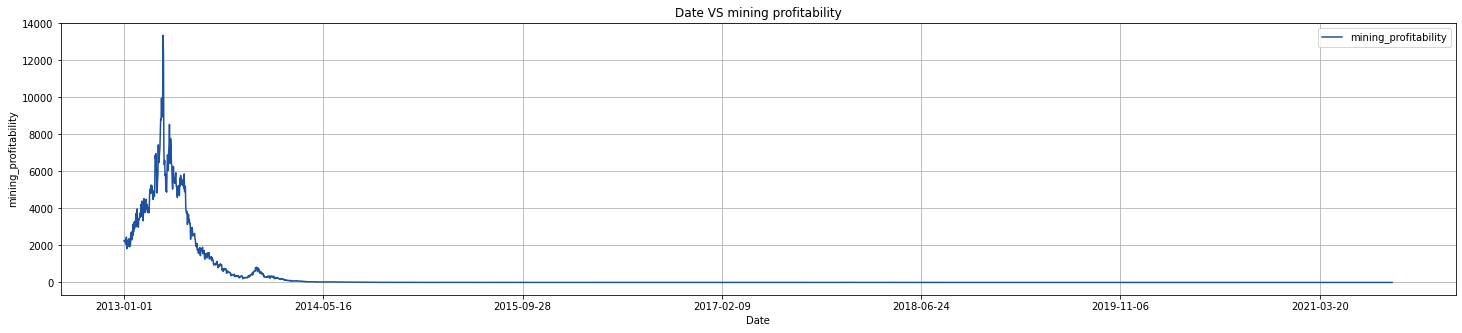

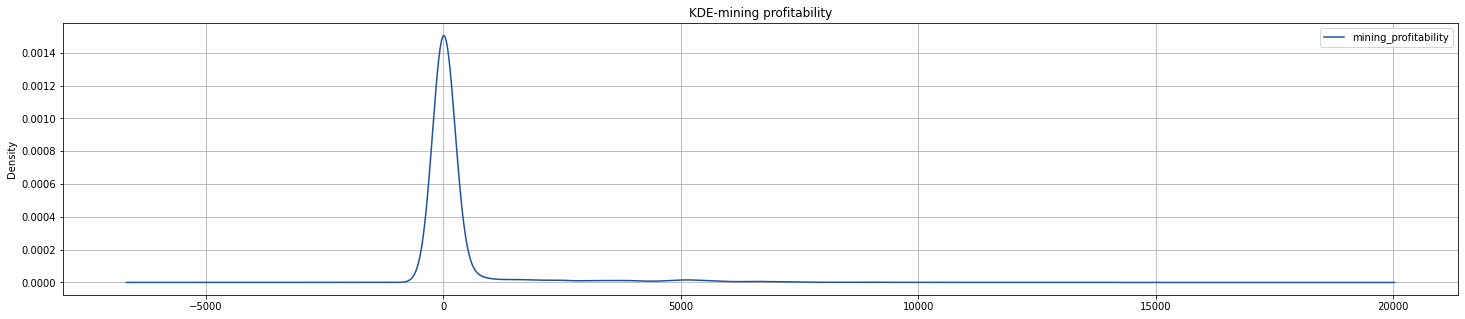

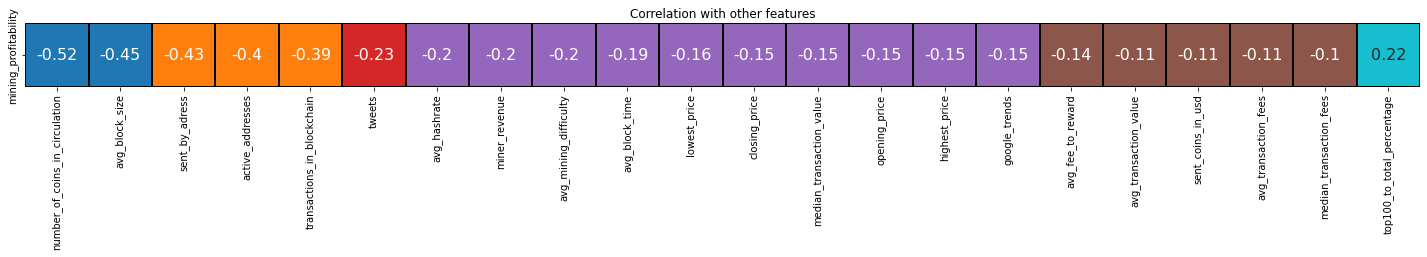

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='mining_profitability')

**Observations**

1. The distribution is heavy peaked and right skewed.

2. The bar plot implies that as the popularity gained, the profitability decreased heavily. 
3. The profitability doesn’t have any relation with majority of features but has some positive correlation with top 100 to total ratio. 

###09.Sent coins in USD per day

This are total Bitcoins sent daily in USD.

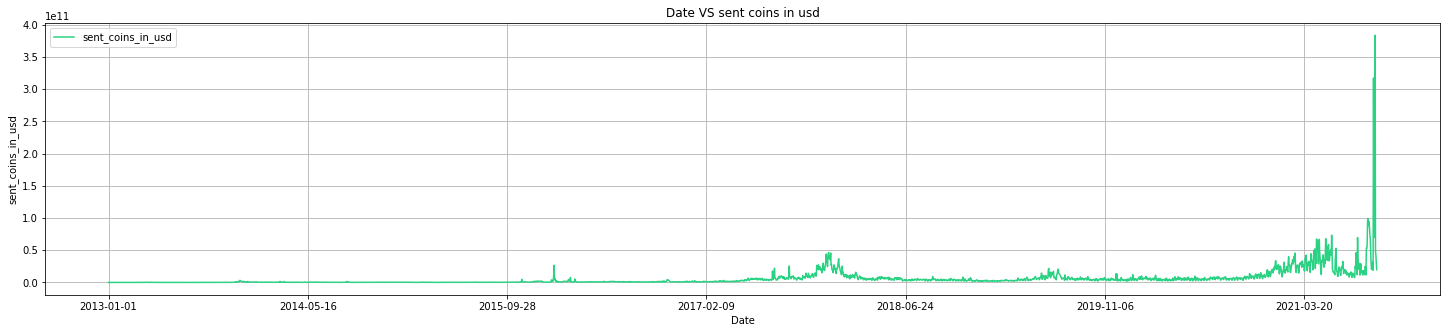

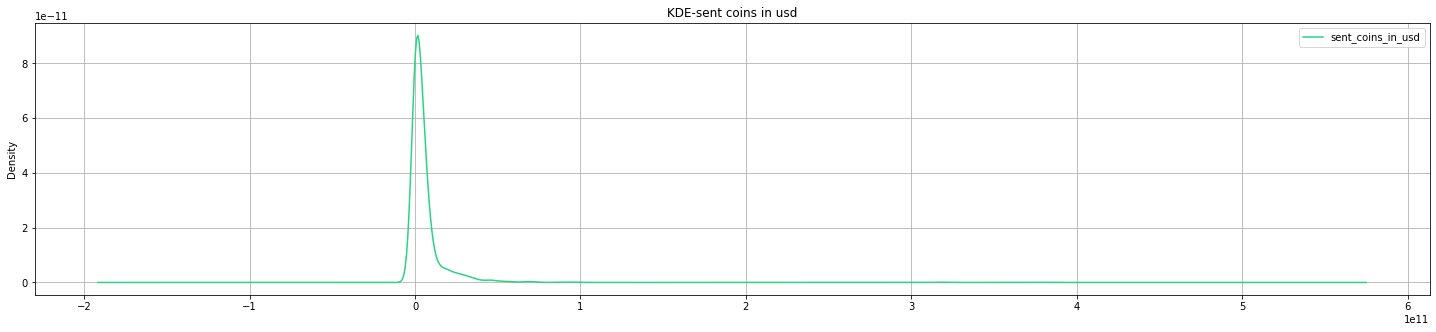

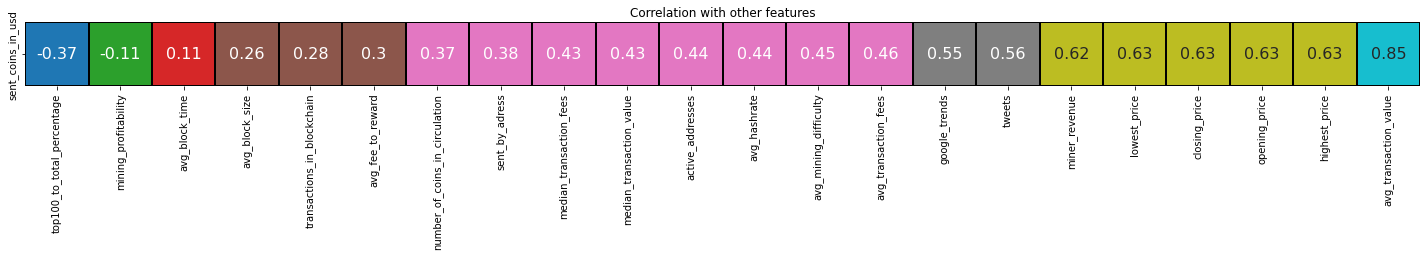

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='sent_coins_in_usd')

**Observations**

1. The distribution is heavy peaked and right skewed.

2. As the prices have increased, the number of transactions also have increased
3. Sent coins has a good correlation with EOD prices, transaction values and google trends.



###10 & 11.Average & Median transaction fee, USD
* Each transaction can have an associated transaction fee determined by the sender. The miners who verify the transaction receive the transaction fee.

* Transactions with higher fees reward the Bitcoin miners to process them sooner than transactions with lower fees

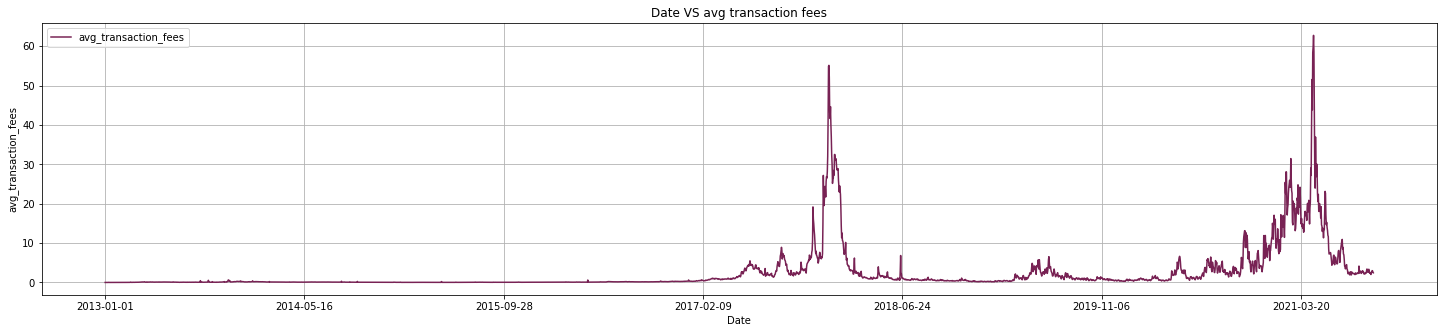

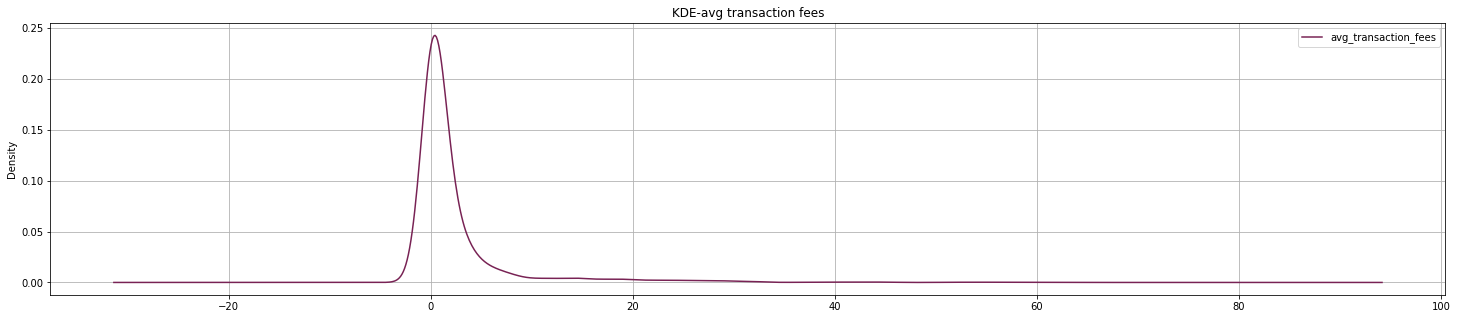

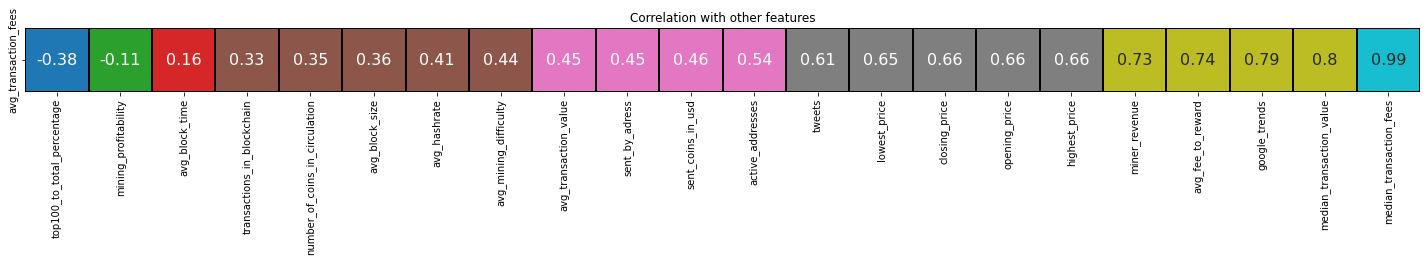

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_transaction_fees')

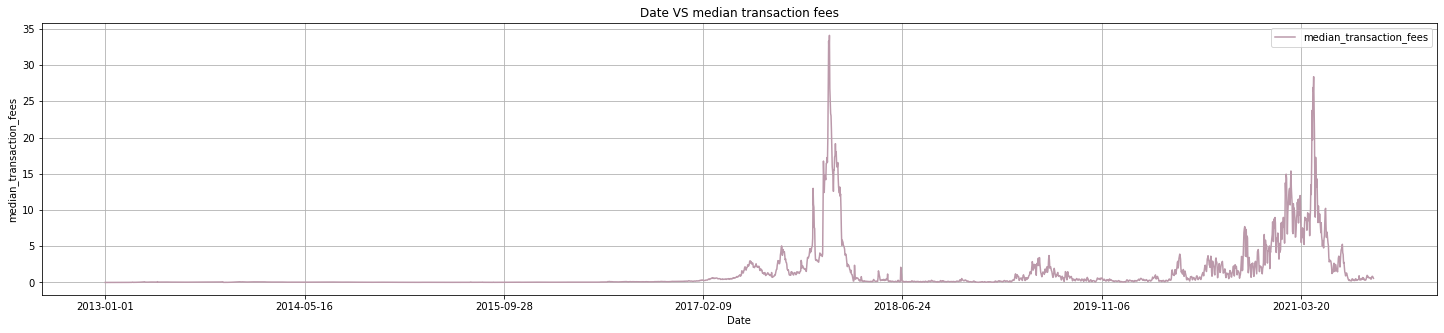

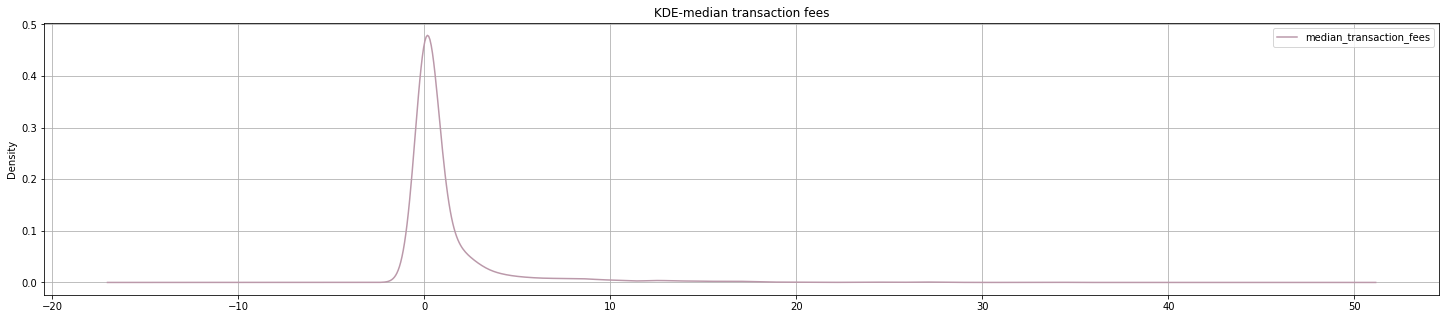

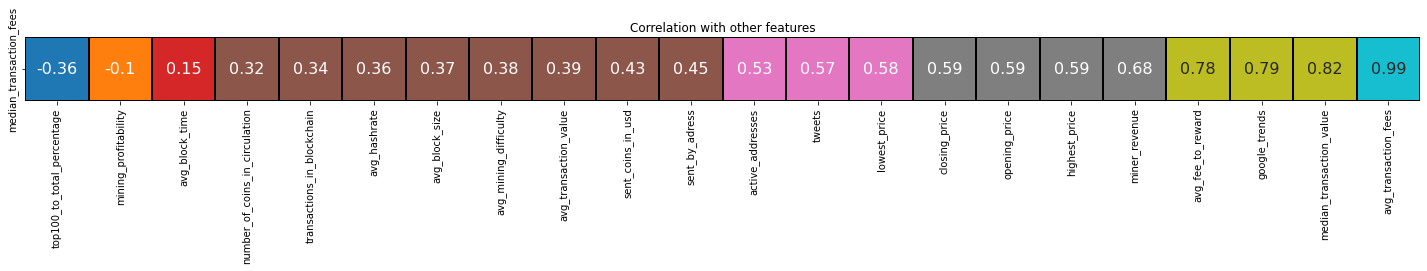

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='median_transaction_fees')

**Observations**

1.   The transaction fees paid to miners has very skewed distribution
2.   Intuitively, it can be understood that as prices increased, the fees also increased but with a correlation with price is less than compared to google trends, number of sent coins.
3.  Both average fee and median fee follow a very similar distribution, which implies that for on a single day, neither the fees paid are paid heavily nor they are too less



###12.Average block time (minutes)
* Block time is the time required to create the next block in a chain. It is a time taken by a blockchain miner to find a solution to the hash, the random series of characters that are associated with the block.

* For a bitcoin, usually it is around 10 minutes but can fluctuate depending on the hashrate of the network.

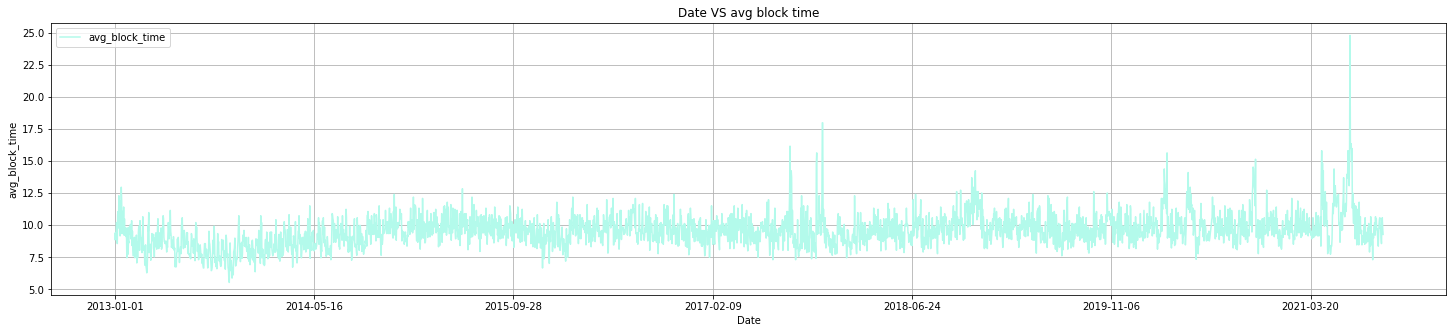

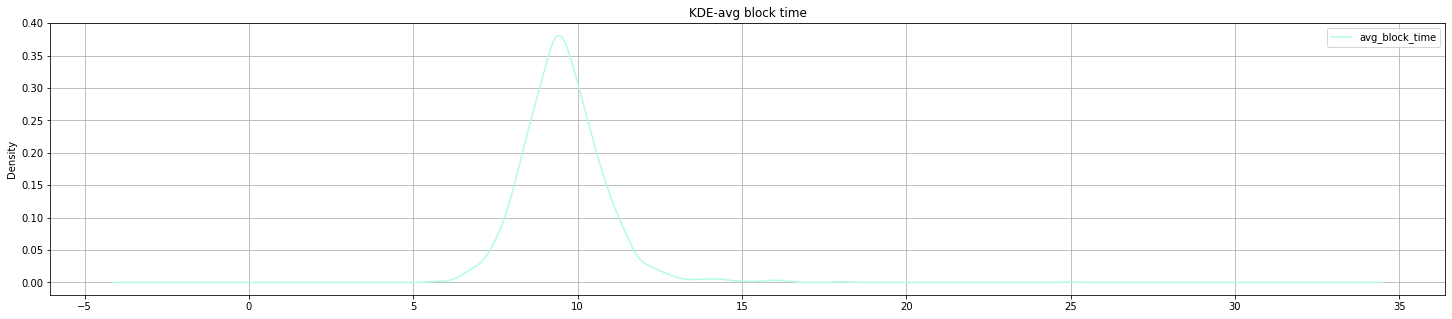

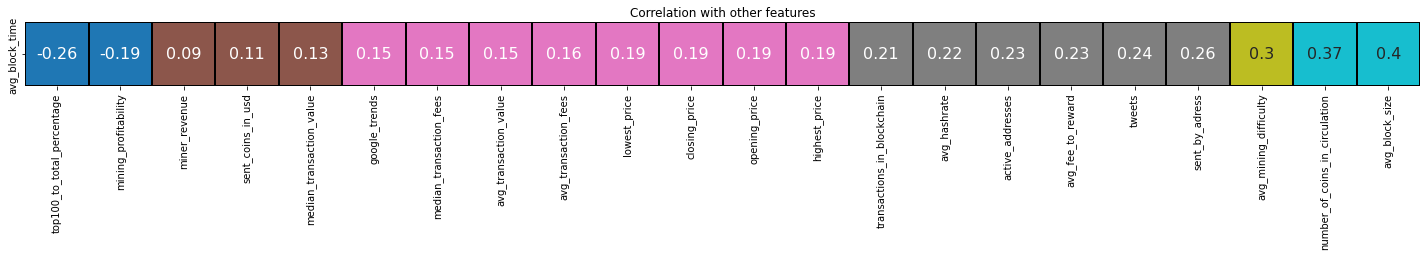

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_block_time')

**Observations**

1.   The time required to mine a block mostly remains around 10 minute (IQR of 8.79 to 10.2)

2.   The higher block time implies higher difficulty and lower values tell lower difficulty. We can also observe this from positive correlation with mining difficulty and the number of sent by addresses.



###14 Avg. Transaction Value in USD

The average value of the transactions in Bitcoin

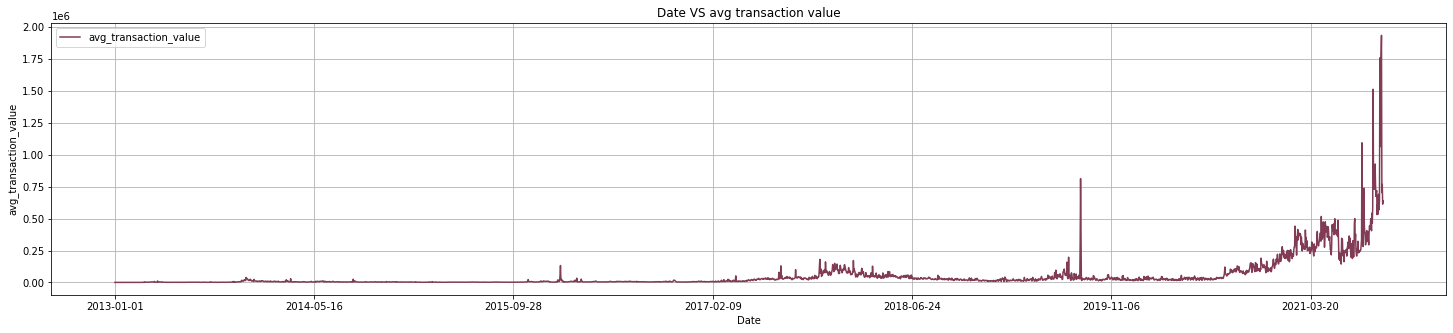

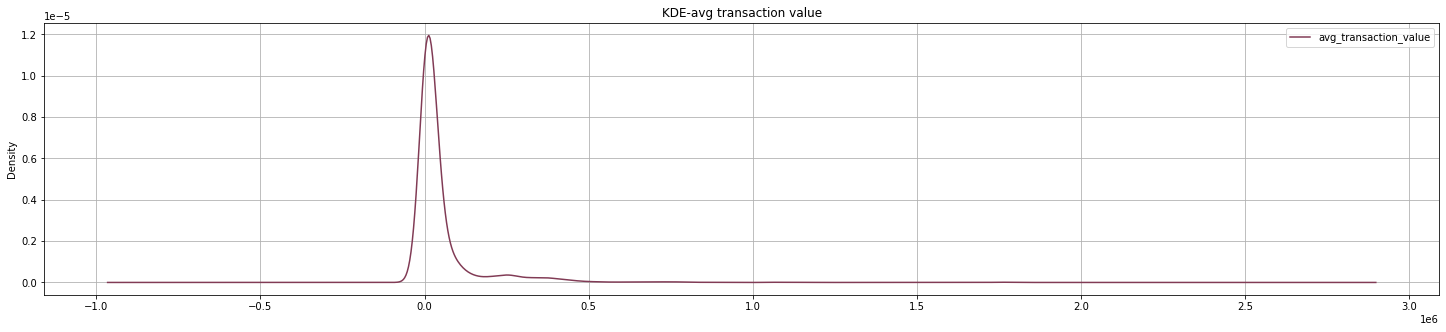

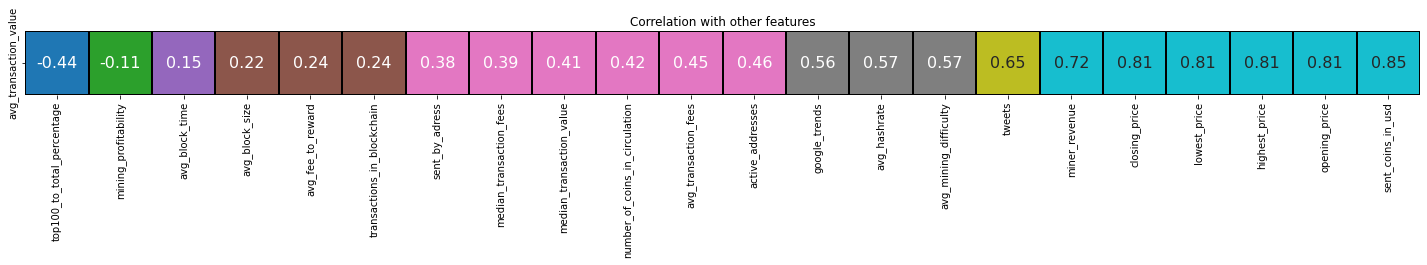

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_transaction_value')

**Observations**

1.  The average transaction increase is because of Bitcoin whales and institutional investors are adding more cryptocurrency to their portfolios. 

2.   As interest in cryptocurrencies increased and cryptocurrency market caps reached peaks, daily transactions also increased to a peak of. This is also visible from high correlation with market cap.



###15.Median Transaction Value in USD

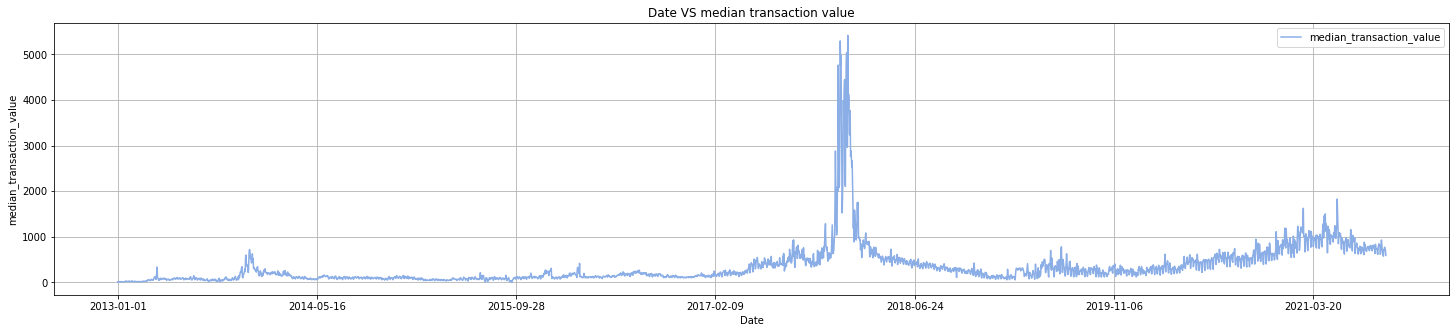

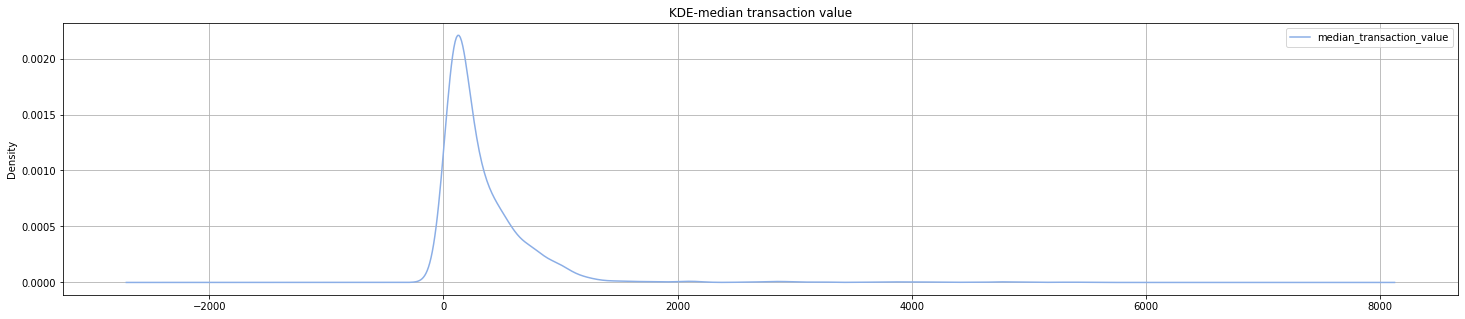

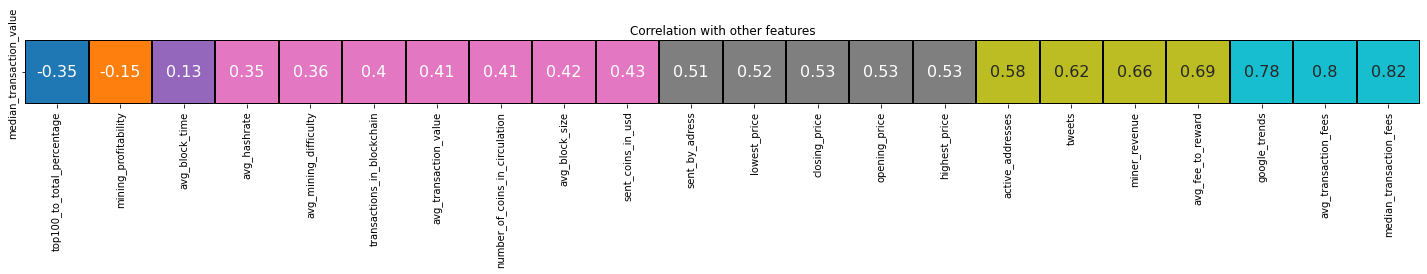

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='median_transaction_value')

**Observations**

1.   Unlike transaction fees, median and avg transaction values are not highly correlated, which implies on a single day there are outliers in transaction value.

2.   As seen in avg transaction value, Big players are trying to buy more but those transactions are outliers, making median value less correlated to avg.



###16.Number of coins in circulation
* The total number of mined bitcoin that are currently circulating on the network.

*  The total supply of BTC is limited and pre-defined in the Bitcoin protocol at 21 million, with the mining reward decreasing over time. This graph shows how many Bitcoins have already been mined or put into circulation.

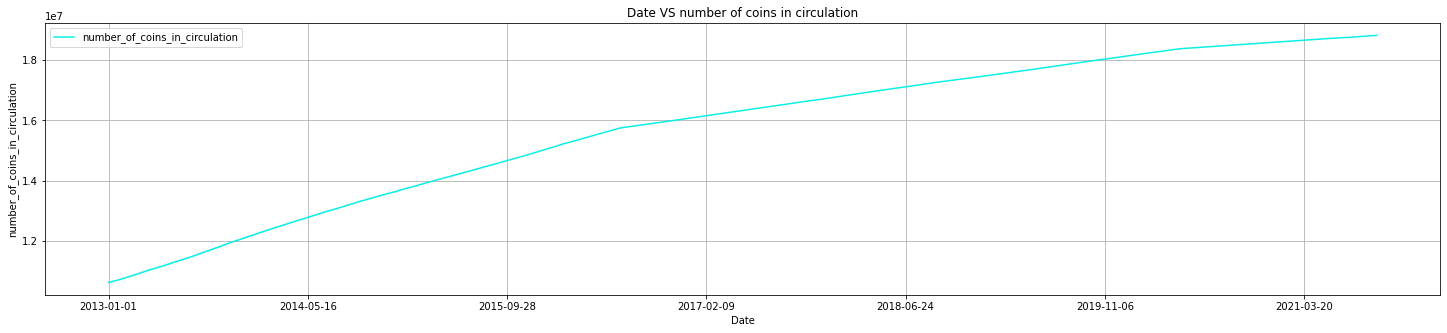

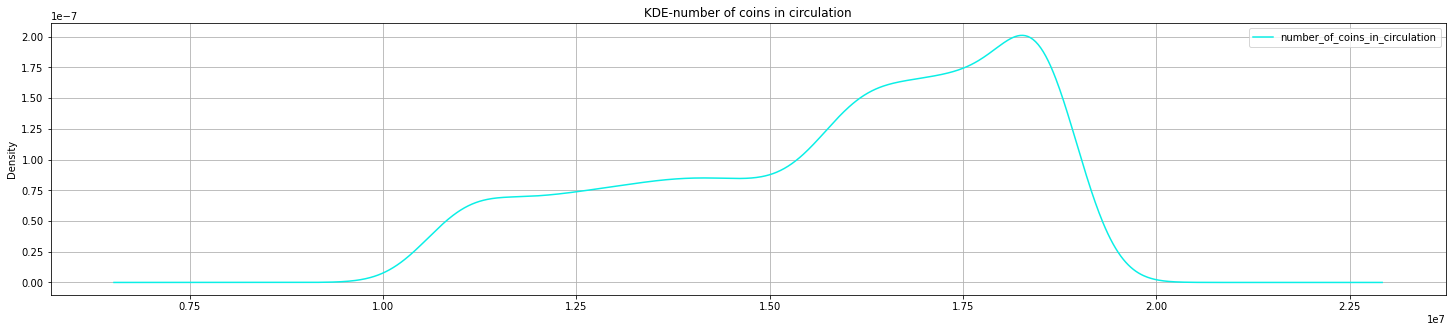

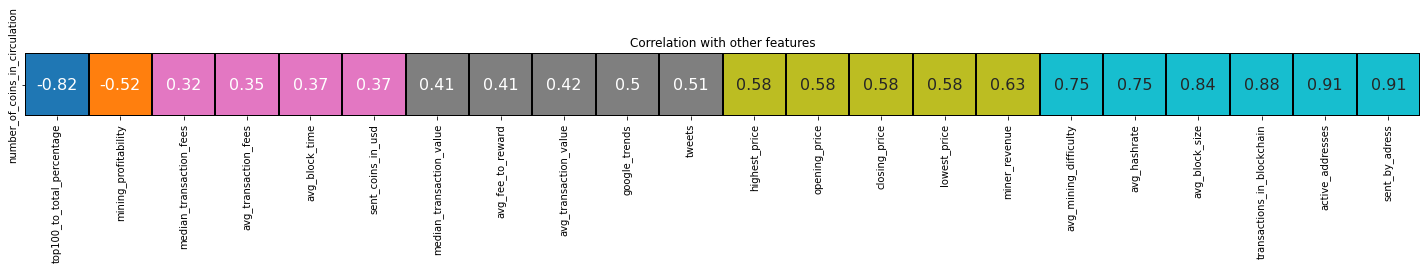

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='number_of_coins_in_circulation')

**Observations**

1.   This graph shows the supply of bitcoins in the market. 

2. Although the direct correlation is less, but this feature might be helpful in predicting the price as prices directly depend on supply. currently demand is higher than supply so despite higher supply the prices continue to price



###17.Miner Revenue
* Total value in USD of coinbase block rewards and transaction fees paid to miners.

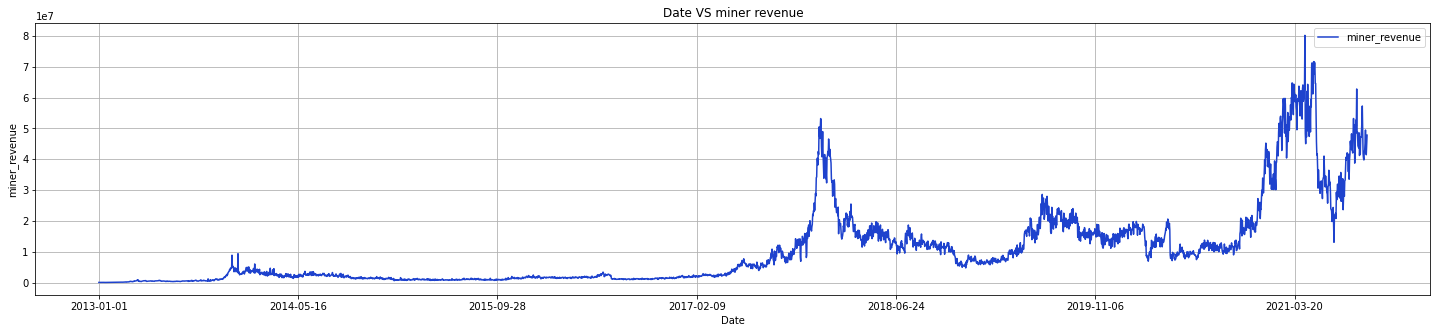

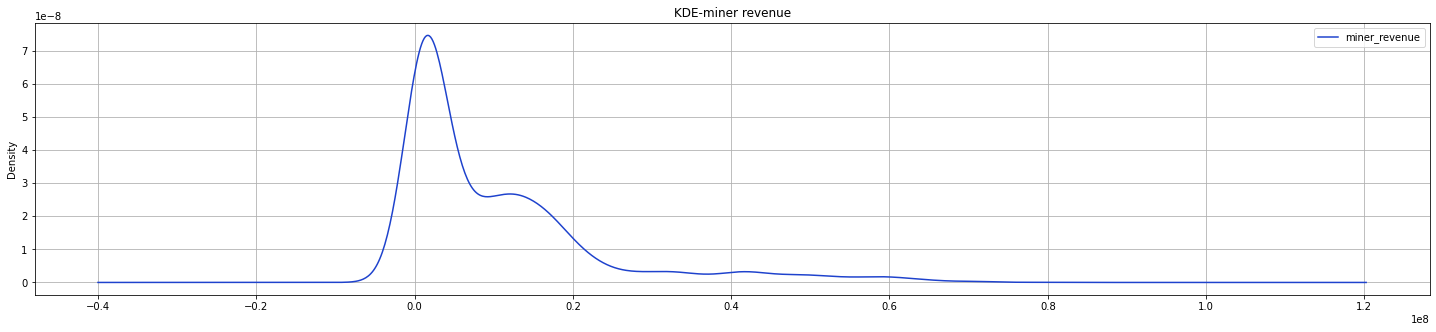

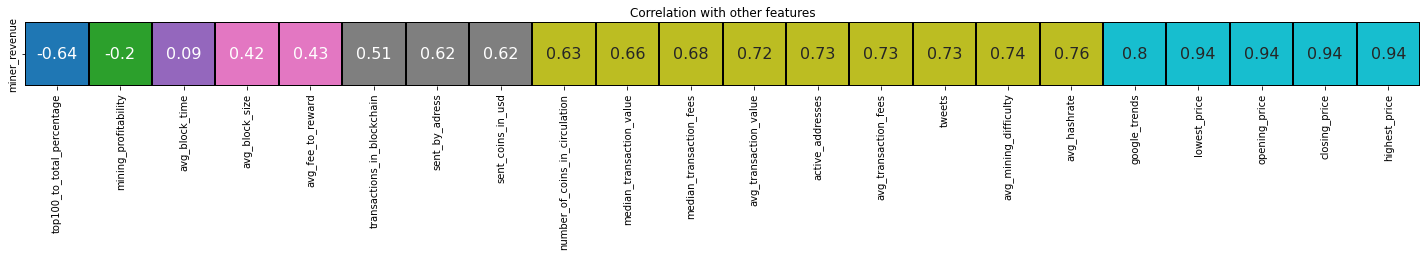

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='miner_revenue')

**Observations**

1.  This feature shows very high correlation with all target varaiables. As miners get a bitcoin as a reward thus increasing supply of bitcoins which ulimately impacts the price.



###18 & 19.Tweets & Google Trends to "Bitcoin"  per day

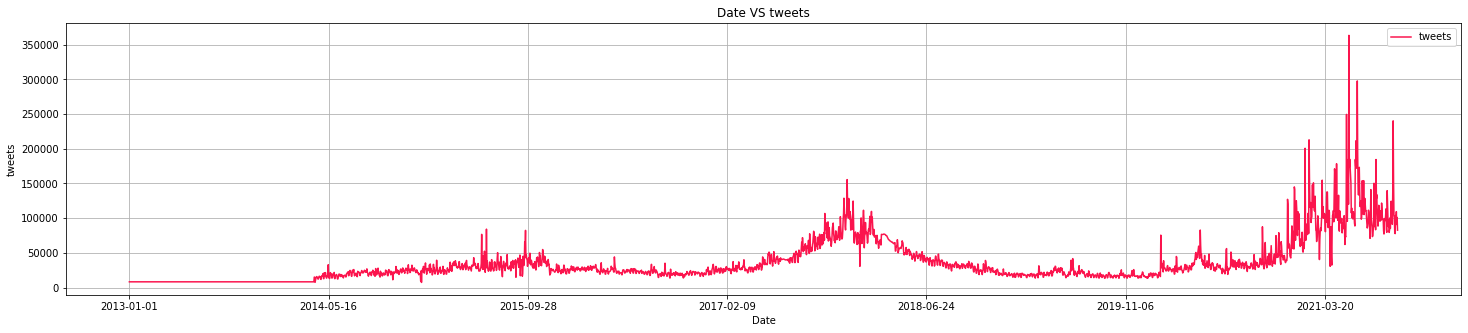

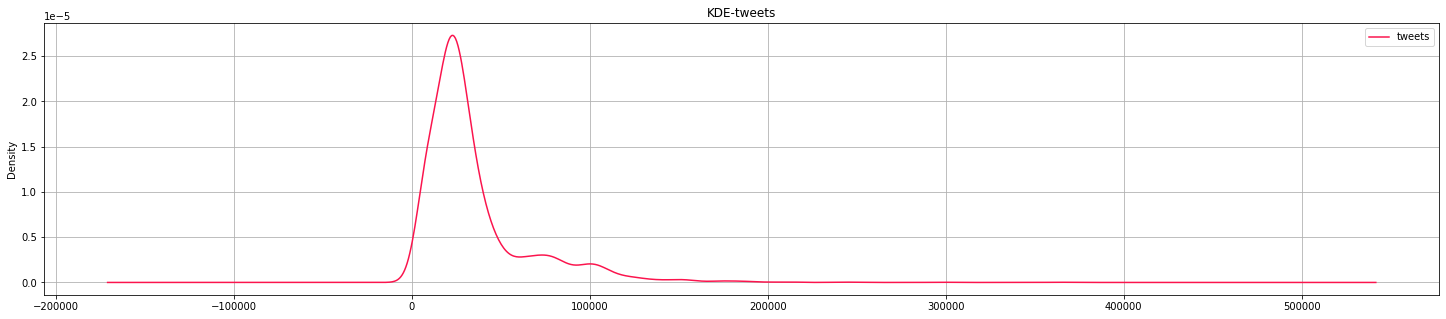

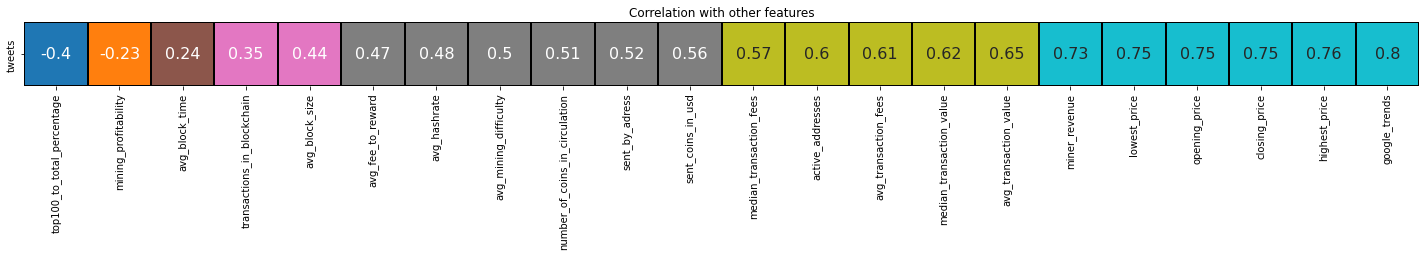

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='tweets')

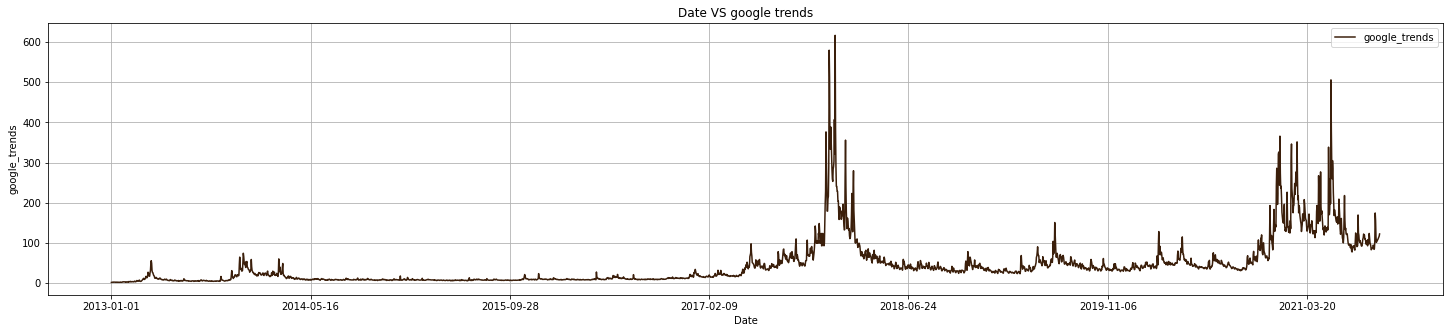

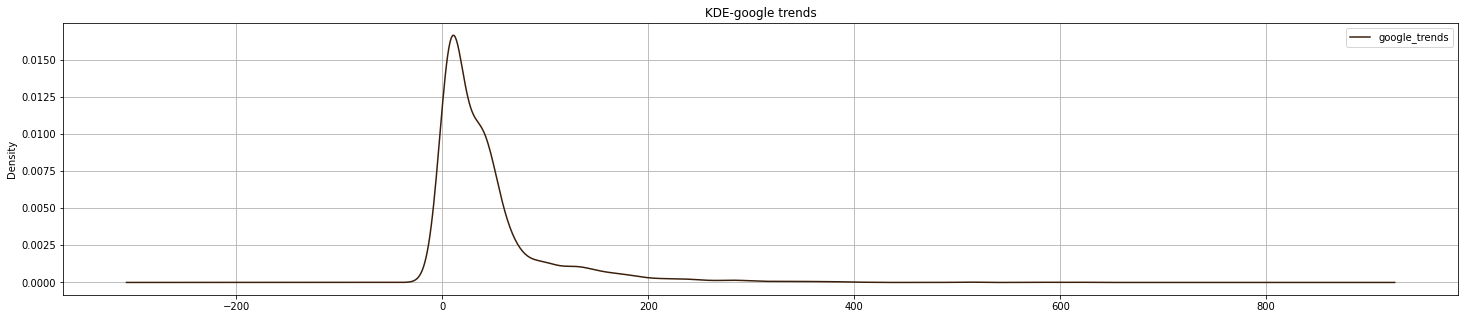

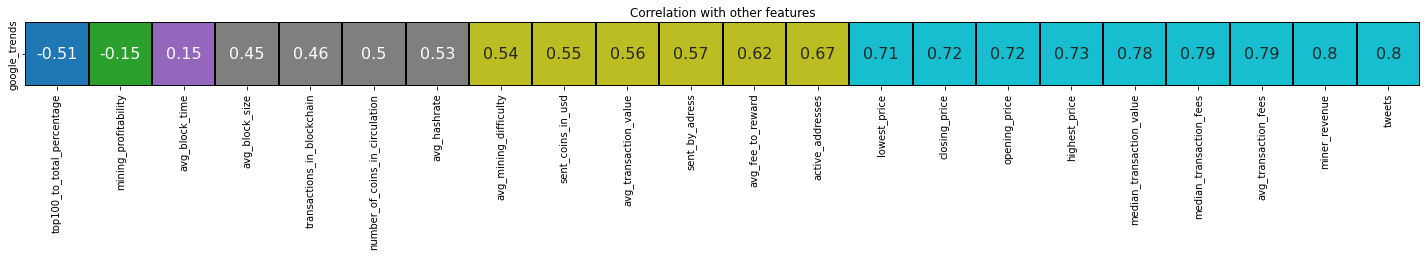

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='google_trends')

**Observations**

1.   Both social media trends seem useful for prediction as both of them show a good correlation with each other and a positive correlation with price.

2. As bitcoin is a digital currency, it affects the social media such that if prices increase or as the number of sent coins increase, bitcoin trends on social media.



###20.Top 100 Richest Addresses to Total coins %

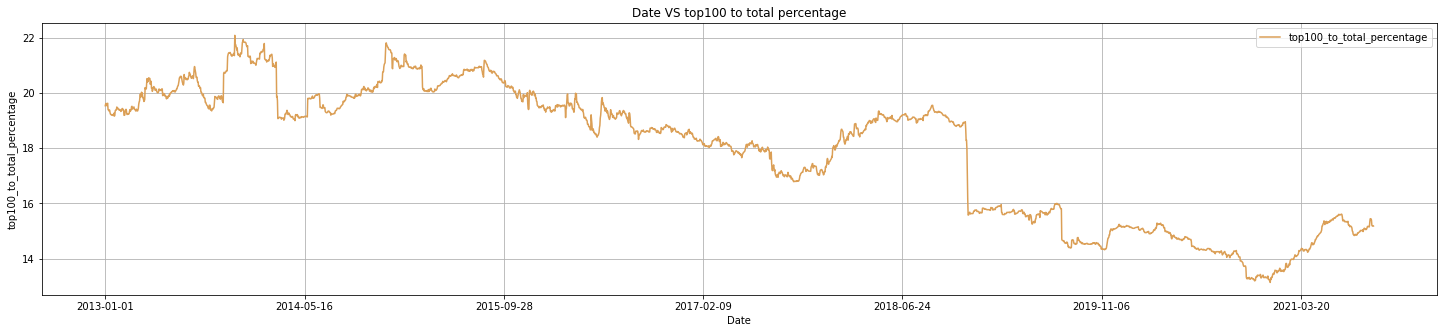

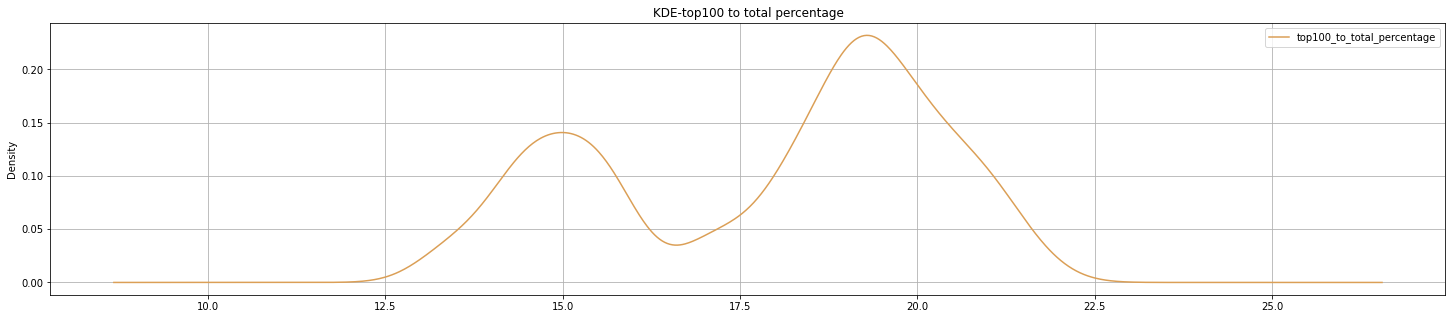

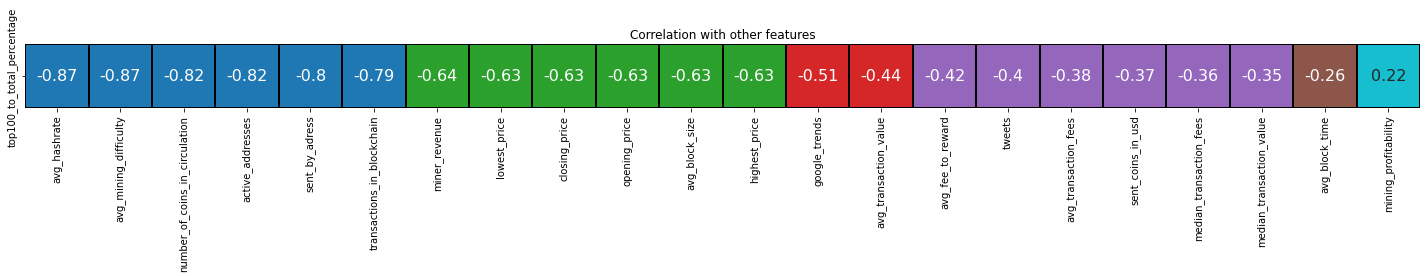

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='top100_to_total_percentage')

**Observations**

1.  Since the inception of bitcoin, mostly top 100 remained between 15% to 19%

2. With more people joining the bandwagon, the top 100 percentage has been decreased and currently stands around 15

3.   Feature mostly has inverse correlation with other features and has some positive correlation with profitability of mining as few people who got profit belong to top100



###21.Average Fee Percentage in Total Block Reward
* Bitcoin block rewards are new bitcoins awarded to cryptocurrency miners for being the first to solve a complex math problem and creating a new block of verified bitcoin transactions. 

* It started at 50 BTC and halves every 210,000 blocks. The current reward lies at 6.25.

* Following feature is the ratio of the fee sent in a transaction to the reward

for verifying that transaction by the other users.

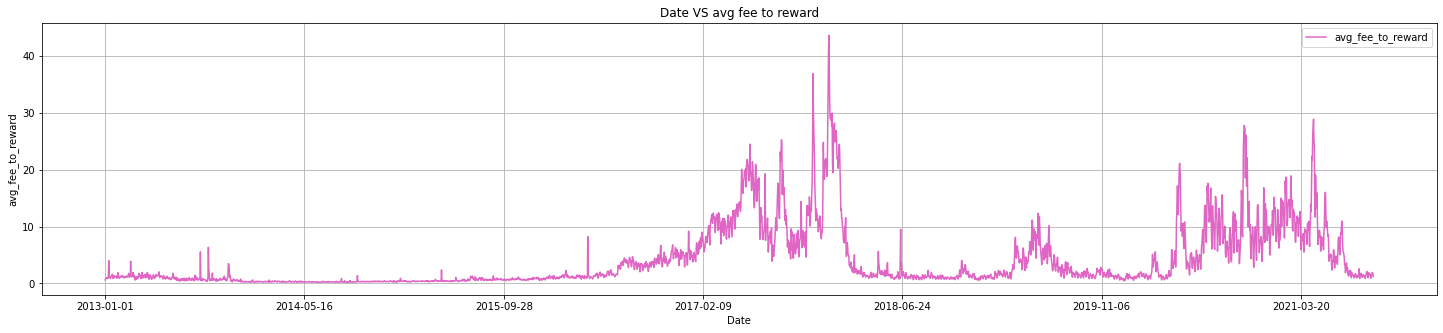

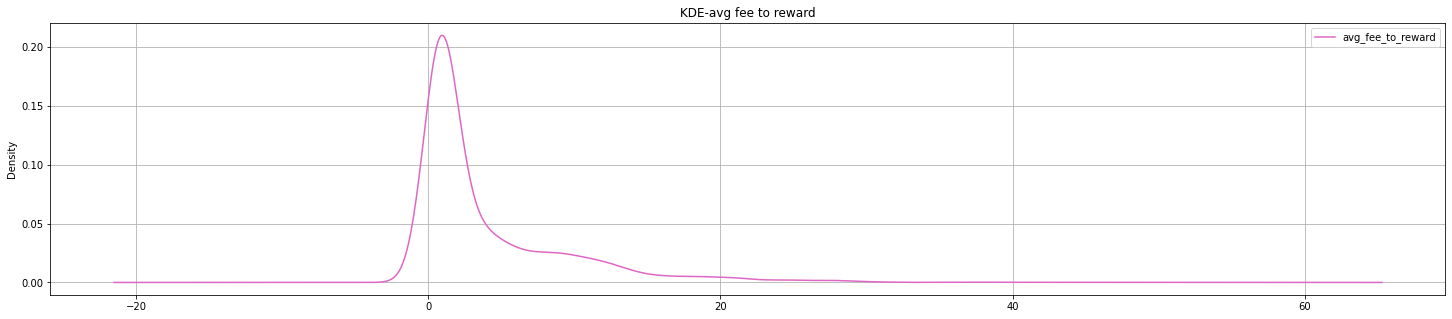

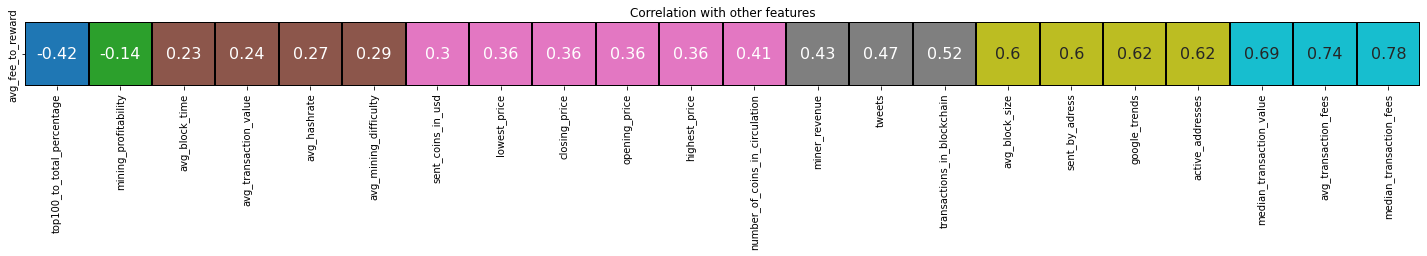

In [ ]:
plot_data(final_df_next_day_closing_price,feature_name='avg_fee_to_reward')

**Observations**

1.   In the period from 2013 to 2016, the reward was 25 bitcoins, but the fees paid are less.

2.   From period 2016 to 2020, the reward was reduced to 12.5 BTC. In this period the fees paid are most as where maximum value is around 43% of reward.

3. From June 2020, the rewards were decreased to 6.25. Now the fees paid are less compared to earlier ratio, but the ration increases as the denominator is reduced.
4. The correlation with transaction fees is expected but also can be observed with google trends and number of sent by address.

